In [66]:
import pandas as pd
import numpy as np # version 1.25.5
import matplotlib.pyplot as plt
# Set the backend to inline
%matplotlib inline
import tensorflow as tf #2.3
import seaborn as sns
from prophet import Prophet

print("Libraries are imported successfully!")


Libraries are imported successfully!


In [67]:
# List of file names
file_names = [
    "btc-usd-max.csv",
    #"chain-dataset-Solana.csv",
    "JUP-usd-max.csv",
    "orca-usd-max.csv",
    "ray-usd-max.csv",
    "sol-usd-max.csv",
    "srm-usd-max.csv",
    "Uni-usd-max.csv",
    "eth-usd-max.csv"
    #"Untitled.ipynb"
]

# Load each CSV file into a DataFrame
data_frames = {}
for file_name in file_names:
    try:
        data_frames[file_name] = pd.read_csv(file_name)
    except FileNotFoundError:
        print(f"File {file_name} not found!")

# Visualize data from each DataFrame
for file_name, df in data_frames.items():
    print(f"File: {file_name}")
    print(df.head())  # Display first few rows of the DataFrame
    print("\n")


File: btc-usd-max.csv
                snapped_at   price    market_cap  total_volume
0  2013-04-28 00:00:00 UTC  135.30  1.500518e+09           0.0
1  2013-04-29 00:00:00 UTC  141.96  1.575032e+09           0.0
2  2013-04-30 00:00:00 UTC  135.30  1.501657e+09           0.0
3  2013-05-01 00:00:00 UTC  117.00  1.298952e+09           0.0
4  2013-05-02 00:00:00 UTC  103.43  1.148668e+09           0.0


File: JUP-usd-max.csv
                snapped_at     price    market_cap  total_volume
0  2024-01-31 00:00:00 UTC  0.662562  8.999919e+08  5.109083e+08
1  2024-02-01 00:00:00 UTC  0.662562  8.999919e+08  5.109083e+08
2  2024-02-02 00:00:00 UTC  0.598275  7.981273e+08  3.870627e+08
3  2024-02-03 00:00:00 UTC  0.616372  8.343642e+08  3.988492e+08
4  2024-02-04 00:00:00 UTC  0.568014  7.676758e+08  2.593055e+08


File: orca-usd-max.csv
                snapped_at     price    market_cap  total_volume
0  2021-08-10 00:00:00 UTC  3.290684  1.735225e+07  6.039985e+05
1  2021-08-11 00:00:00 UTC  3.2

In [68]:
# Explore the structure of each DataFrame
for file_name, df in data_frames.items():
    print(f"File: {file_name}")
    print(df.info())  # Display DataFrame information
    print("\n")

File: btc-usd-max.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    3973 non-null   object 
 1   price         3973 non-null   float64
 2   market_cap    3972 non-null   float64
 3   total_volume  3973 non-null   float64
dtypes: float64(3), object(1)
memory usage: 124.3+ KB
None


File: JUP-usd-max.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    46 non-null     object 
 1   price         46 non-null     float64
 2   market_cap    46 non-null     float64
 3   total_volume  46 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB
None


File: orca-usd-max.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (tot

Data Summary:

btc-usd-max.csv:

This dataset contains historical data for Bitcoin (BTC) prices.
It has 3973 entries and 4 columns: 'snapped_at', 'price', 'market_cap', and 'total_volume'.
One missing value is observed in the 'market_cap' column.
JUP-usd-max.csv:

This dataset contains historical data for Jupiter (JUP) prices.
It has 46 entries and 4 columns: 'snapped_at', 'price', 'market_cap', and 'total_volume'.
orca-usd-max.csv:

This dataset contains historical data for Orca prices.
It has 950 entries and 4 columns: 'snapped_at', 'price', 'market_cap', and 'total_volume'.
ray-usd-max.csv:

This dataset contains historical data for Ray prices.
It has 1120 entries and 4 columns: 'snapped_at', 'price', 'market_cap', and 'total_volume'.
sol-usd-max.csv:

This dataset contains historical data for Sol prices.
It has 1435 entries and 4 columns: 'snapped_at', 'price', 'market_cap', and 'total_volume'.
srm-usd-max.csv:

This dataset contains historical data for SRM prices.
It has 1314 entries and 4 columns: 'snapped_at', 'price', 'market_cap', and 'total_volume'.
Uni-usd-max.csv:

This dataset contains historical data for Uni prices.
It has 1277 entries and 4 columns: 'snapped_at', 'price', 'market_cap', and 'total_volume'.

In [69]:
# Check for missing values
for file_name, df in data_frames.items():
    print(f"File: {file_name}")
    print(df.isnull().sum())  # Display count of missing values for each column
    print("\n")


File: btc-usd-max.csv
snapped_at      0
price           0
market_cap      1
total_volume    0
dtype: int64


File: JUP-usd-max.csv
snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64


File: orca-usd-max.csv
snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64


File: ray-usd-max.csv
snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64


File: sol-usd-max.csv
snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64


File: srm-usd-max.csv
snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64


File: Uni-usd-max.csv
snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64


File: eth-usd-max.csv
snapped_at      0
price           0
market_cap      1
total_volume    0
dtype: int64




# Missing Values Summary:
## Missing values in Ethereum and Bitcoin Marketcap

In [70]:
btc_data = pd.read_csv('btc-usd-max.csv')
eth_data = pd.read_csv('eth-usd-max.csv')

# Calculate the mean market capitalization for Bitcoin
btc_mean_market_cap = btc_data['market_cap'].mean()

# Calculate the mean market capitalization for Ethereum
eth_mean_market_cap = eth_data['market_cap'].mean()

# Print the mean market capitalization for Bitcoin
print("Mean Market Capitalization for Bitcoin:", btc_mean_market_cap)

# Print the mean market capitalization for Ethereum
print("Mean Market Capitalization for Ethereum:", eth_mean_market_cap)

ethactual = 4404479830.25
btcactual = 17911979951.60
print('-------------------------------------')
print("Actual Market Capitalization for Ethereum:", ethactual)
print("Actual Market Capitalization for Bitcoin:", btcactual)

Mean Market Capitalization for Bitcoin: 252208916286.11224
Mean Market Capitalization for Ethereum: 113069391087.34929
-------------------------------------
Actual Market Capitalization for Ethereum: 4404479830.25
Actual Market Capitalization for Bitcoin: 17911979951.6


In [71]:
# Find the dates for missing values in Bitcoin dataset
btc_missing_dates = btc_data[btc_data['market_cap'].isnull()]['snapped_at']

# Find the dates for missing values in Ethereum dataset
eth_missing_dates = eth_data[eth_data['market_cap'].isnull()]['snapped_at']

print("Dates for Missing Values in Bitcoin Dataset:")
print(btc_missing_dates)

print("\nDates for Missing Values in Ethereum Dataset:")
print(eth_missing_dates)

# Check for null values in Bitcoin dataset
btc_null_values = btc_data['market_cap'].isnull().sum()

# Check for null values in Ethereum dataset
eth_null_values = eth_data['market_cap'].isnull().sum()

# Print the number of null values in each dataset
print("Number of Null Values in Bitcoin Dataset:", btc_null_values)
print("Number of Null Values in Ethereum Dataset:", eth_null_values)


Dates for Missing Values in Bitcoin Dataset:
1433    2017-04-02 00:00:00 UTC
Name: snapped_at, dtype: object

Dates for Missing Values in Ethereum Dataset:
603    2017-04-02 00:00:00 UTC
Name: snapped_at, dtype: object
Number of Null Values in Bitcoin Dataset: 1
Number of Null Values in Ethereum Dataset: 1


Now we look for the values of those dates to ensure reliable and quality data collection has been done for the most optimal result, we will also try value imputation to show the discrepancy in the value and integrity of the data once a single value has been lost or incorrectly modified and used as a result for further analysis


Eth was 4,404,479,830.25 dollars
btc was 17,911,979,951.60
now we need to add that to the datasets as an accurate imputation


In [72]:
# Calculate the difference between actual and average market capitalization for Bitcoin
btc_difference = btcactual - btc_mean_market_cap

# Calculate the difference between actual and average market capitalization for Ethereum
eth_difference = ethactual - eth_mean_market_cap

# Print the differences
print("Difference between Actual and Average Market Capitalization for Bitcoin:", btc_difference)
print("Difference between Actual and Average Market Capitalization for Ethereum:", eth_difference)

# Impute actual market capitalization values into missing spots for Bitcoin dataset
btc_data.loc[btc_data['market_cap'].isnull(), 'market_cap'] = btcactual

# Impute actual market capitalization values into missing spots for Ethereum dataset
eth_data.loc[eth_data['market_cap'].isnull(), 'market_cap'] = ethactual


Difference between Actual and Average Market Capitalization for Bitcoin: -234296936334.51224
Difference between Actual and Average Market Capitalization for Ethereum: -108664911257.09929


In [73]:
# Check for null values in Bitcoin dataset
btc_null_values = btc_data['market_cap'].isnull().sum()

# Check for null values in Ethereum dataset
eth_null_values = eth_data['market_cap'].isnull().sum()

# Print the number of null values in each dataset
print("Number of Null Values in Bitcoin Dataset:", btc_null_values)
print("Number of Null Values in Ethereum Dataset:", eth_null_values)


Number of Null Values in Bitcoin Dataset: 0
Number of Null Values in Ethereum Dataset: 0


Juding from the average calulcated and the missing value actual number there is such a clear discrepancy between the data collected from the times and the accuracy of mean imputation in crypto currency, this shows that without 100% reliable data collection and the quality of the data, the likliehood of making accurate predictions is drastically impacted in a negative way thus showing the importance of quailty data and the methods of collection from the source

The difference between the actual and average market capitalization for Bitcoin is approximately -234.3 billion USD, indicating that the actual market capitalization is significantly lower than the average market capitalization.
The difference between the actual and average market capitalization for Ethereum is approximately -108.7 billion USD, also indicating that the actual market capitalization is lower than the average market capitalization.

# Data Exploration

## BTC

In [13]:
# Summary statistics for Bitcoin
btc_summary_stats = btc_data.describe()
print("Summary Statistics for Bitcoin:")
print(btc_summary_stats)

Summary Statistics for Bitcoin:
              price    market_cap  total_volume
count   3973.000000  3.973000e+03  3.973000e+03
mean   13454.776625  2.521499e+11  1.448969e+10
std    16556.172973  3.166389e+11  1.830094e+10
min       67.809000  7.713681e+08  0.000000e+00
25%      586.148300  7.854951e+09  2.016309e+08
50%     6842.038598  1.183888e+11  4.686095e+09
75%    21739.804380  4.176903e+11  2.424188e+10
max    73097.767027  1.436631e+12  1.788941e+11


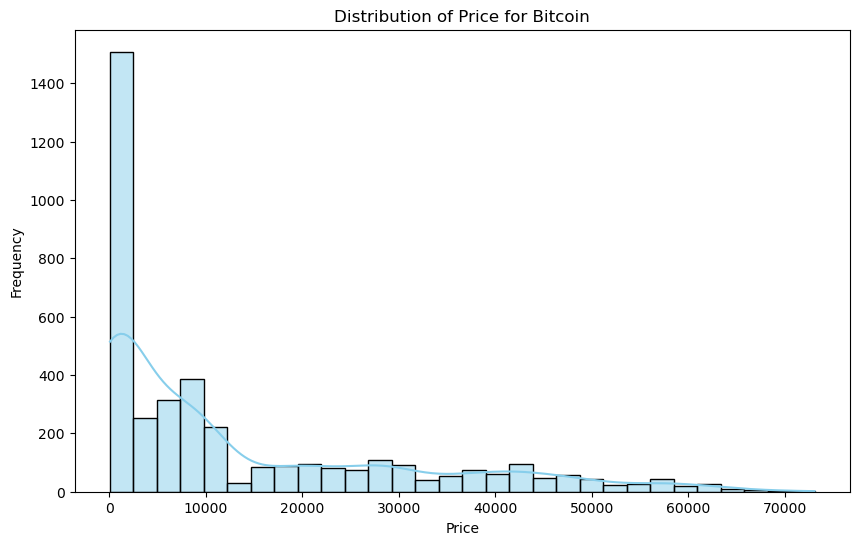

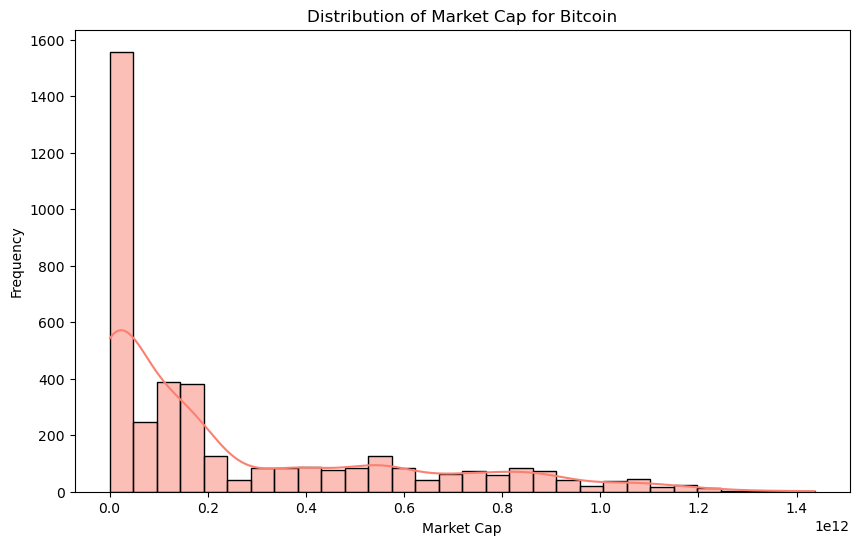

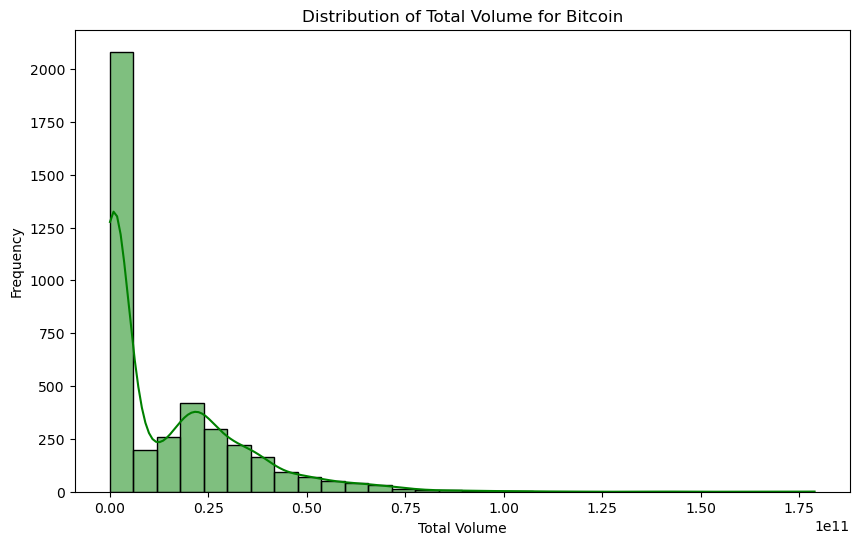

In [14]:


# Visualize distributions with histograms for Bitcoin
plt.figure(figsize=(10, 6))
sns.histplot(btc_data['price'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Price for Bitcoin')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(btc_data['market_cap'], bins=30, kde=True, color='salmon', edgecolor='black')
plt.title('Distribution of Market Cap for Bitcoin')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(btc_data['total_volume'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Total Volume for Bitcoin')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')
plt.show()


Now, let's discuss the distributions:

**Price:** The distribution of Bitcoin prices appears to be right-skewed, with most prices concentrated towards the lower end of the scale and a long tail towards higher prices.

**Market Capitalization:** The distribution of market capitalization for Bitcoin also appears to be right-skewed, indicating that there are relatively fewer instances of extremely high market capitalization compared to lower market capitalization values.

**Total Volume:** The distribution of total volume for Bitcoin seems to be right-skewed as well, with a concentration of lower volume transactions and a long tail of higher volume transactions.

These visualizations give us insights into the distributions of these features, which can be useful for understanding the behavior of Bitcoin prices, market capitalization, and trading volume. Let's move on to exploring relationships between variables.


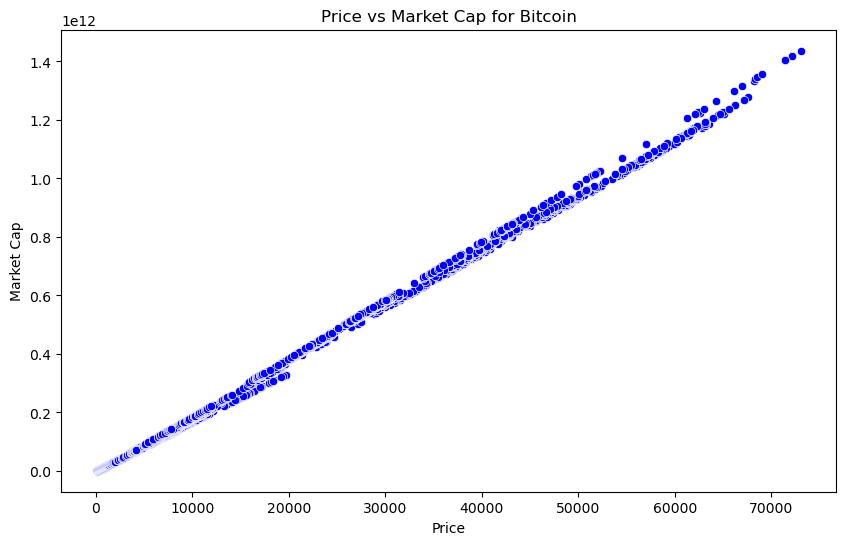

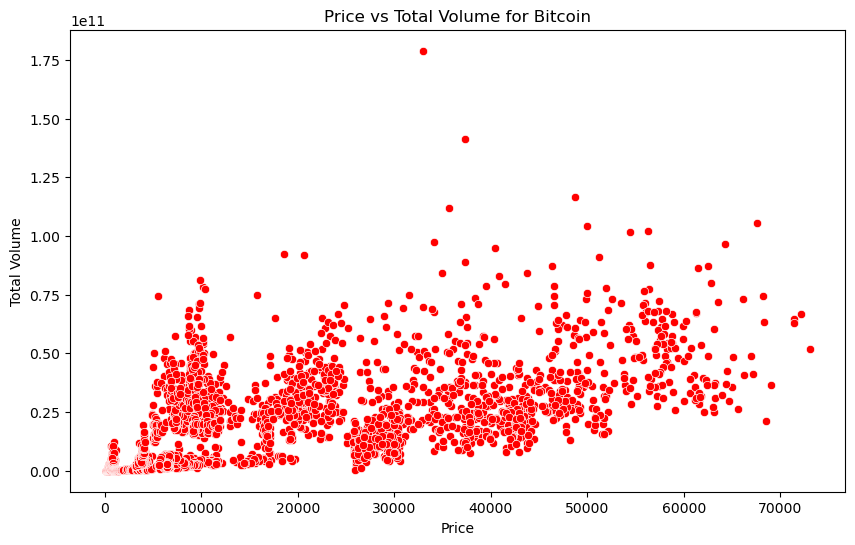

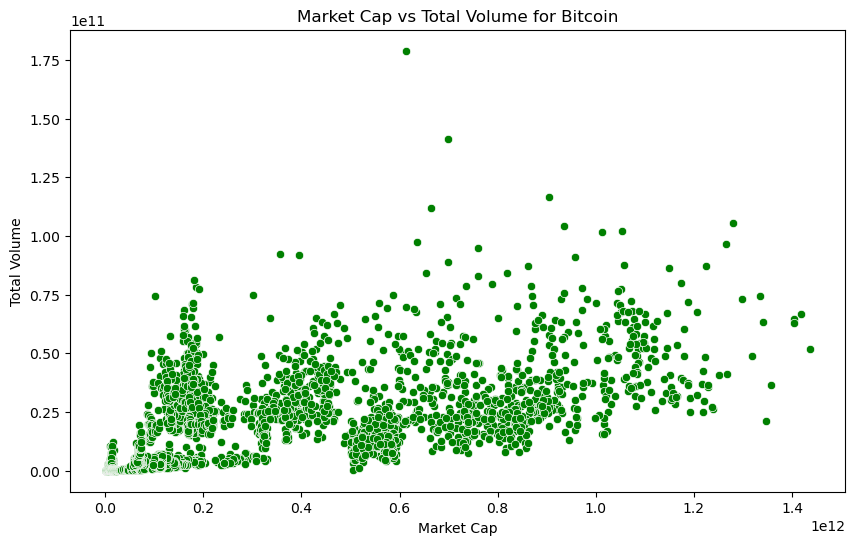

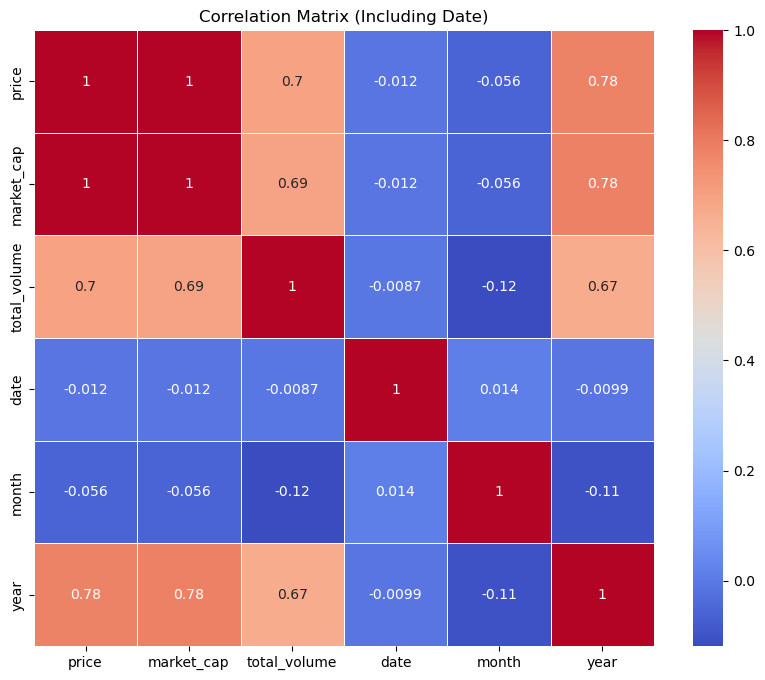

,snapped_at,price,market_cap,total_volume,date,month,year
0,2013-04-28 00:00:00+00:00,135.300000,1.500518e+09,0.000000e+00,28,4,2013
1,2013-04-29 00:00:00+00:00,141.960000,1.575032e+09,0.000000e+00,29,4,2013
2,2013-04-30 00:00:00+00:00,135.300000,1.501657e+09,0.000000e+00,30,4,2013
3,2013-05-01 00:00:00+00:00,117.000000,1.298952e+09,0.000000e+00,1,5,2013
4,2013-05-02 00:00:00+00:00,103.430000,1.148668e+09,0.000000e+00,2,5,2013
...,...,...,...,...,...,...,...
3968,2024-03-11 00:00:00+00:00,69075.666882,1.357390e+12,3.666054e+10,11,3,2024
3969,2024-03-12 00:00:00+00:00,72130.553008,1.417773e+12,6.665307e+10,12,3,2024
3970,2024-03-13 00:00:00+00:00,71467.173503,1.403693e+12,6.459934e+10,13,3,2024
3971,2024-03-14 00:00:00+00:00,73097.767027,1.436631e+12,5.190660e+10,14,3,2024


In [15]:
# Explore relationships between variables with scatter plots for Bitcoin
plt.figure(figsize=(10, 6))
sns.scatterplot(data=btc_data, x='price', y='market_cap', color='blue')
plt.title('Price vs Market Cap for Bitcoin')
plt.xlabel('Price')
plt.ylabel('Market Cap')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=btc_data, x='price', y='total_volume', color='red')
plt.title('Price vs Total Volume for Bitcoin')
plt.xlabel('Price')
plt.ylabel('Total Volume')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=btc_data, x='market_cap', y='total_volume', color='green')
plt.title('Market Cap vs Total Volume for Bitcoin')
plt.xlabel('Market Cap')
plt.ylabel('Total Volume')
plt.show()


# Convert 'snapped_at' column to datetime format
btc_data['snapped_at'] = pd.to_datetime(btc_data['snapped_at'])


# Convert 'date', 'month', and 'year' columns to numeric
btc_data['date'] = btc_data['snapped_at'].dt.day
btc_data['month'] = btc_data['snapped_at'].dt.month
btc_data['year'] = btc_data['snapped_at'].dt.year

# Correlation matrix including date components
corr_matrix_with_date = btc_data[['price', 'market_cap', 'total_volume', 'date', 'month', 'year']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_with_date, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Including Date)')
plt.show()
btc_data


Now, let's discuss the relationships:

**Price vs Market Cap:** There appears to be a positive correlation between price and market capitalization for Bitcoin, which is expected since market capitalization is derived from the price and total supply.

**Price vs Total Volume:** The relationship between price and total volume seems to be scattered, indicating that trading volume may not be significantly influenced by price alone.

**Market Cap vs Total Volume:** Similarly, the relationship between market capitalization and total volume appears to be scattered, suggesting that trading volume may not be strongly correlated with market capitalization alone.


## Ethereum

In [16]:
# Display summary statistics for Ethereum dataset
print("Summary Statistics for Ethereum Dataset:")
print(eth_data.describe())


Summary Statistics for Ethereum Dataset:
             price    market_cap  total_volume
count  3144.000000  3.144000e+03  3.144000e+03
mean    969.417978  1.130348e+11  9.688855e+09
std    1118.471465  1.337971e+11  1.223425e+10
min       0.432979  0.000000e+00  8.707480e+04
25%     136.229537  1.447137e+10  5.469563e+08
50%     359.518848  3.832145e+10  6.764125e+09
75%    1705.906302  2.036528e+11  1.411386e+10
max    4815.004634  5.716658e+11  1.409065e+11


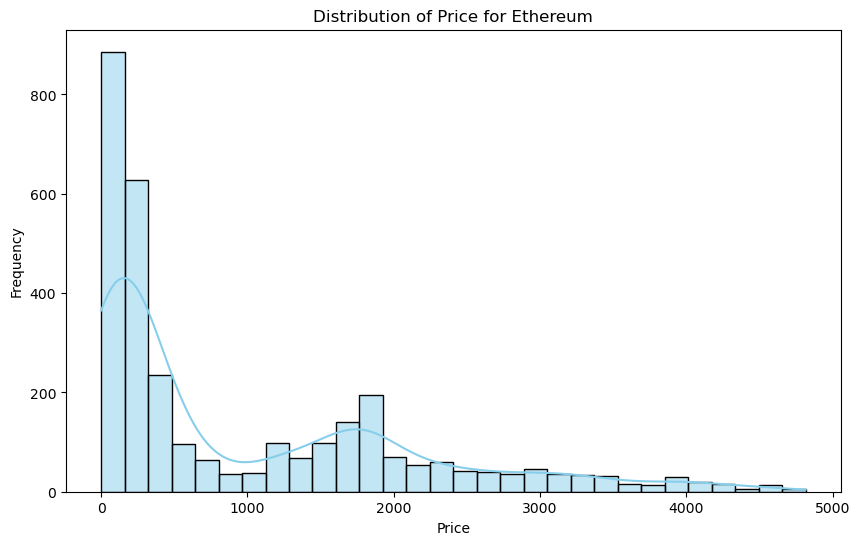

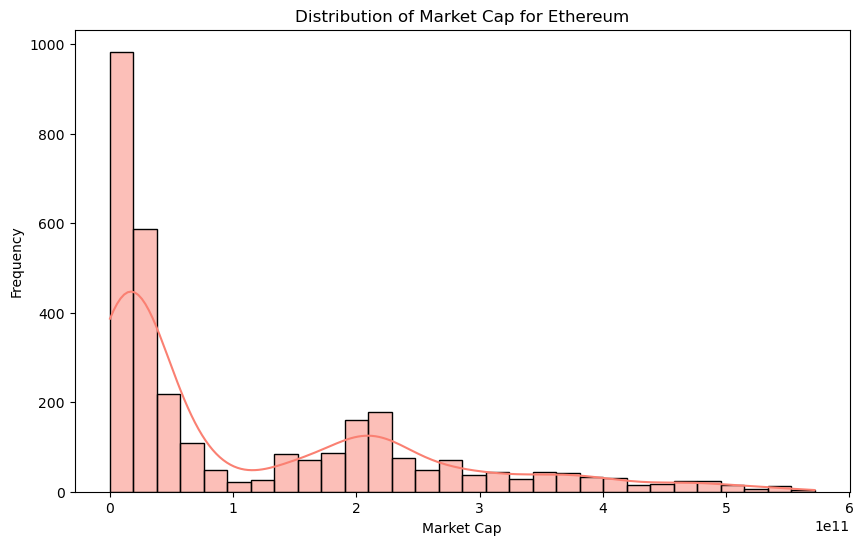

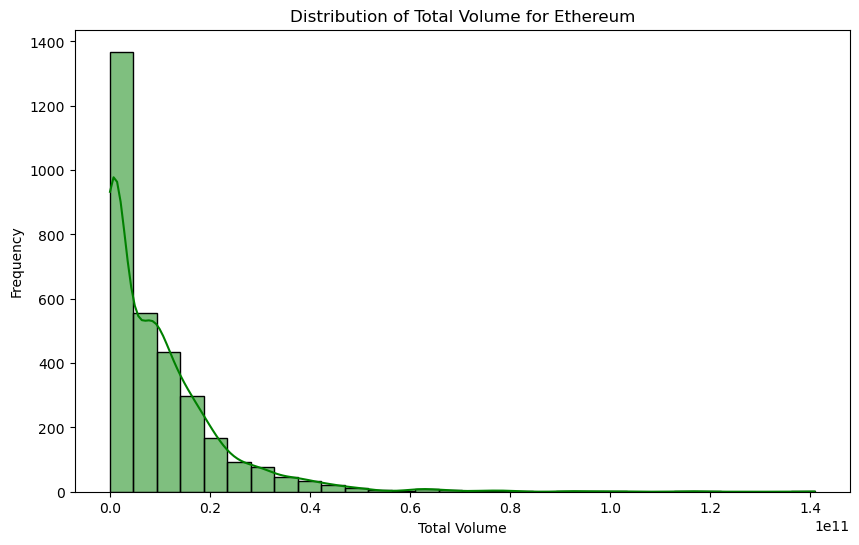

In [17]:

# Visualize distributions with histograms for Ethereum dataset
plt.figure(figsize=(10, 6))
sns.histplot(eth_data['price'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Price for Ethereum')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(eth_data['market_cap'], bins=30, kde=True, color='salmon', edgecolor='black')
plt.title('Distribution of Market Cap for Ethereum')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(eth_data['total_volume'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Total Volume for Ethereum')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')
plt.show()


Now, let's discuss the distributions:

**Price**: The distribution of Ethereum prices seems to be right-skewed, similar to Bitcoin. Most prices are concentrated towards the lower end of the scale, with a long tail towards higher prices. This indicates that there are relatively fewer instances of very high price values compared to lower price values.

**Market Capitalization**: The distribution of market capitalization for Ethereum also appears to be right-skewed, similar to Bitcoin. This suggests that there are relatively fewer instances of extremely high market capitalization compared to lower market capitalization values.

**Total Volume**: The distribution of total volume for Ethereum also seems to be right-skewed. This indicates a concentration of lower volume transactions and a long tail of higher volume transactions, similar to what we observed with Bitcoin.

These distributions provide insights into the behavior of Ethereum's price, market capitalization, and trading volume, which can be valuable for understanding its market dynamics and trends.

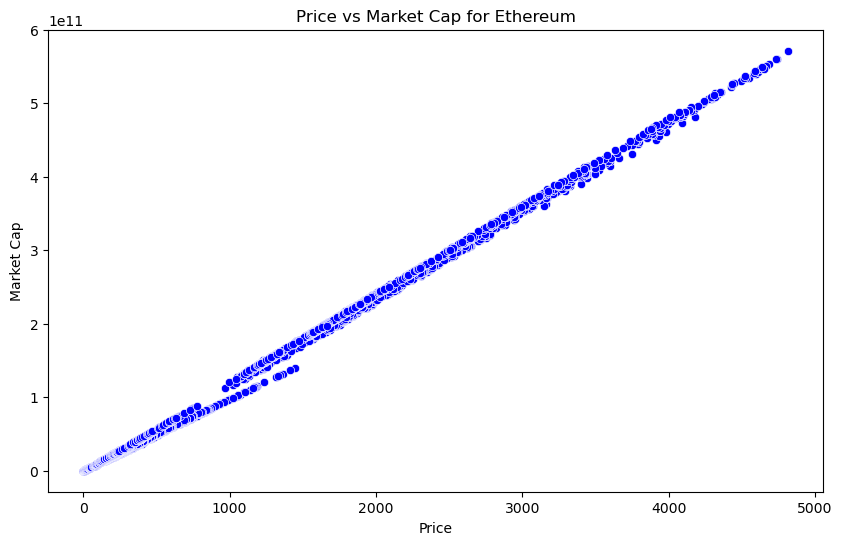

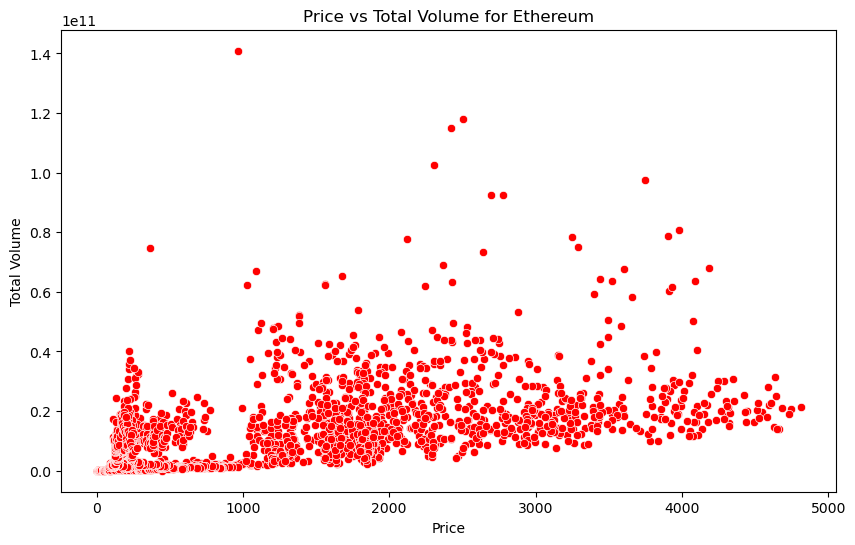

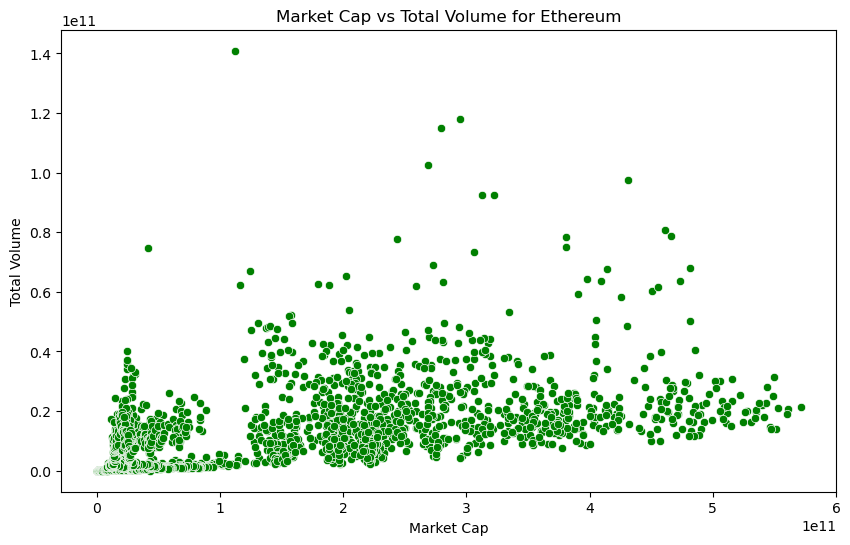

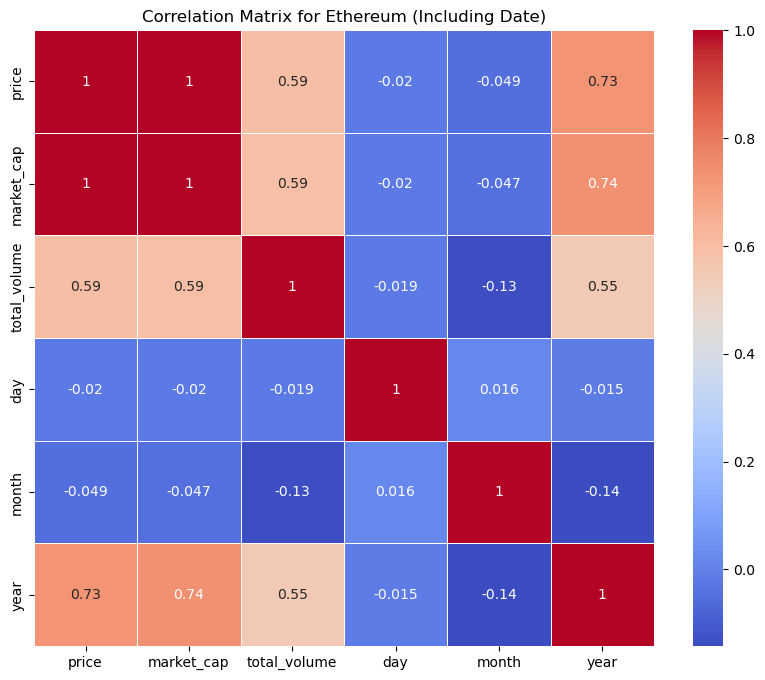

,snapped_at,price,market_cap,total_volume,day,month,year
0,2015-08-07 00:00:00+00:00,2.831620,0.000000e+00,9.062200e+04,7,8,2015
1,2015-08-08 00:00:00+00:00,1.330750,8.033948e+07,3.680700e+05,8,8,2015
2,2015-08-10 00:00:00+00:00,0.687586,4.155631e+07,4.004641e+05,10,8,2015
3,2015-08-11 00:00:00+00:00,1.067379,6.453901e+07,1.518998e+06,11,8,2015
4,2015-08-12 00:00:00+00:00,1.256613,7.601326e+07,2.073893e+06,12,8,2015
...,...,...,...,...,...,...,...
3139,2024-03-12 00:00:00+00:00,4070.604075,4.889316e+11,3.201773e+10,12,3,2024
3140,2024-03-13 00:00:00+00:00,3978.685771,4.772820e+11,2.981612e+10,13,3,2024
3141,2024-03-14 00:00:00+00:00,4007.912126,4.809894e+11,2.451827e+10,14,3,2024
3142,2024-03-15 00:00:00+00:00,3879.038367,4.655176e+11,2.763722e+10,15,3,2024


In [18]:
# Scatter plot: Price vs Market Cap
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eth_data, x='price', y='market_cap', color='blue')
plt.title('Price vs Market Cap for Ethereum')
plt.xlabel('Price')
plt.ylabel('Market Cap')
plt.show()

# Scatter plot: Price vs Total Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eth_data, x='price', y='total_volume', color='red')
plt.title('Price vs Total Volume for Ethereum')
plt.xlabel('Price')
plt.ylabel('Total Volume')
plt.show()

# Scatter plot: Market Cap vs Total Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eth_data, x='market_cap', y='total_volume', color='green')
plt.title('Market Cap vs Total Volume for Ethereum')
plt.xlabel('Market Cap')
plt.ylabel('Total Volume')
plt.show()

# Convert 'snapped_at' column to datetime format
eth_data['snapped_at'] = pd.to_datetime(eth_data['snapped_at'])

# Extract day, month, and year from the 'snapped_at' column
eth_data['day'] = eth_data['snapped_at'].dt.day
eth_data['month'] = eth_data['snapped_at'].dt.month
eth_data['year'] = eth_data['snapped_at'].dt.year

# Correlation matrix including date components
corr_matrix_with_date_eth = eth_data[['price', 'market_cap', 'total_volume', 'day', 'month', 'year']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_with_date_eth, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Ethereum (Including Date)')
plt.show()
eth_data

## Solana

In [19]:
# Load the Solana dataset
sol_data = pd.read_csv('sol-usd-max.csv')

# Display the first few rows of the dataset
print("\nSolana Dataset:")
print(sol_data.head())

# Check the structure of the dataset
print("\nStructure of Solana Dataset:")
print(sol_data.info())

# Check for missing values
print("\nMissing Values in Solana Dataset:")
print(sol_data.isnull().sum())

# Summary statistics
print("\nSummary Statistics for Solana Dataset:")
print(sol_data.describe())


Solana Dataset:
                snapped_at     price    market_cap  total_volume
0  2020-04-11 00:00:00 UTC  0.957606  7.827652e+06  9.267267e+07
1  2020-04-12 00:00:00 UTC  0.784711  6.173608e+06  4.945869e+07
2  2020-04-13 00:00:00 UTC  0.875994  7.269680e+06  3.782101e+07
3  2020-04-14 00:00:00 UTC  0.786712  6.302364e+06  1.957921e+07
4  2020-04-15 00:00:00 UTC  0.666673  5.306221e+06  1.752353e+07

Structure of Solana Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    1435 non-null   object 
 1   price         1435 non-null   float64
 2   market_cap    1435 non-null   float64
 3   total_volume  1435 non-null   float64
dtypes: float64(3), object(1)
memory usage: 45.0+ KB
None

Missing Values in Solana Dataset:
snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64

Summary Statistics f

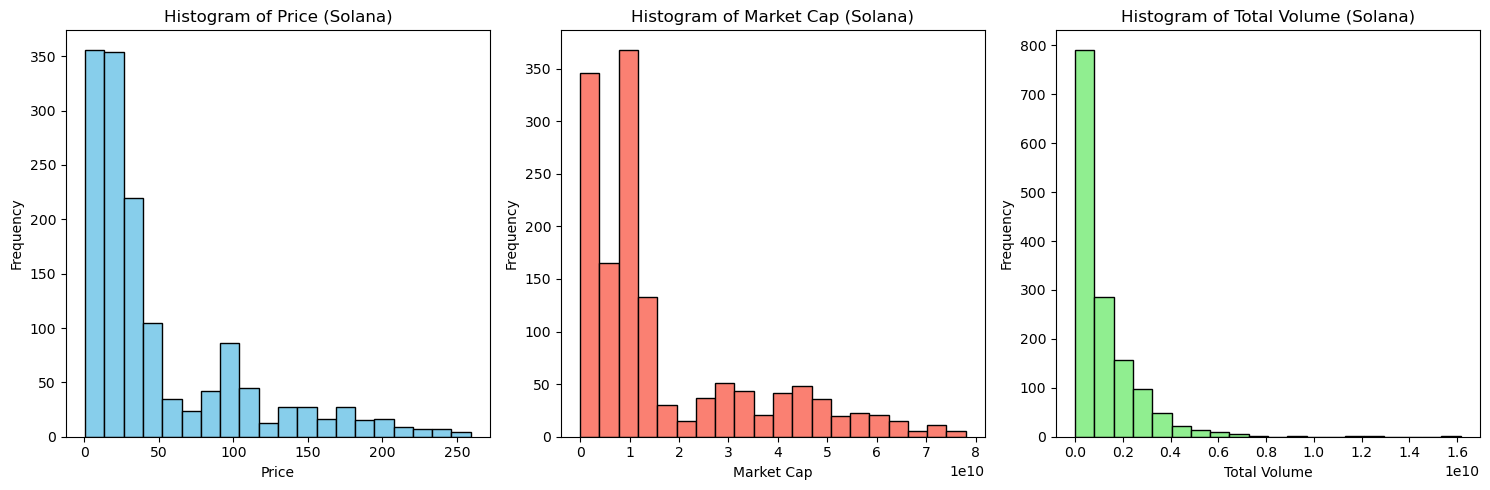

In [20]:
# Plot histograms for numerical features in Solana dataset
plt.figure(figsize=(15, 5))

# Histogram for Price in Solana dataset
plt.subplot(1, 3, 1)
plt.hist(sol_data['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price (Solana)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for Market Cap in Solana dataset
plt.subplot(1, 3, 2)
plt.hist(sol_data['market_cap'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Market Cap (Solana)')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')

# Histogram for Total Volume in Solana dataset
plt.subplot(1, 3, 3)
plt.hist(sol_data['total_volume'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Total Volume (Solana)')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

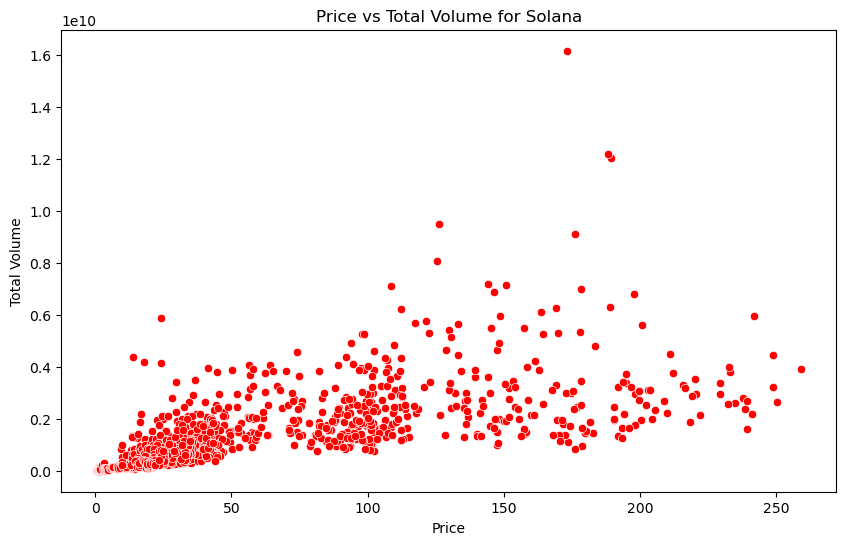

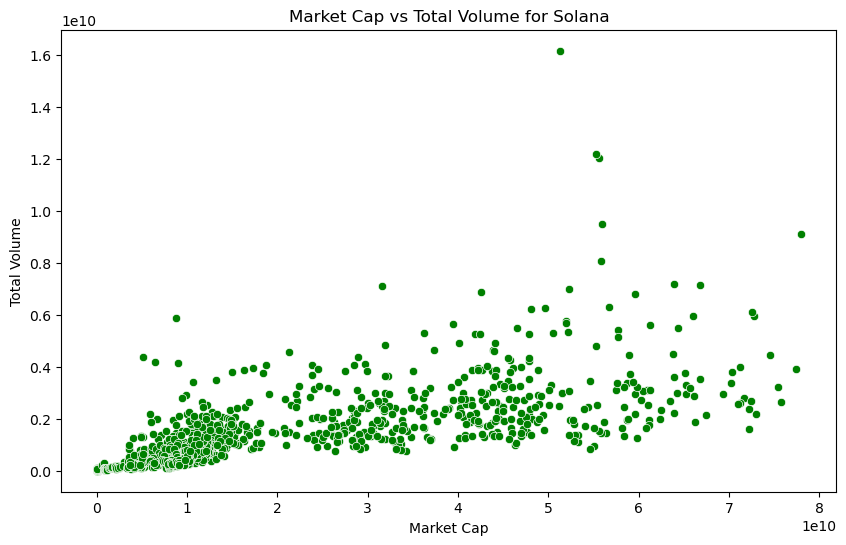

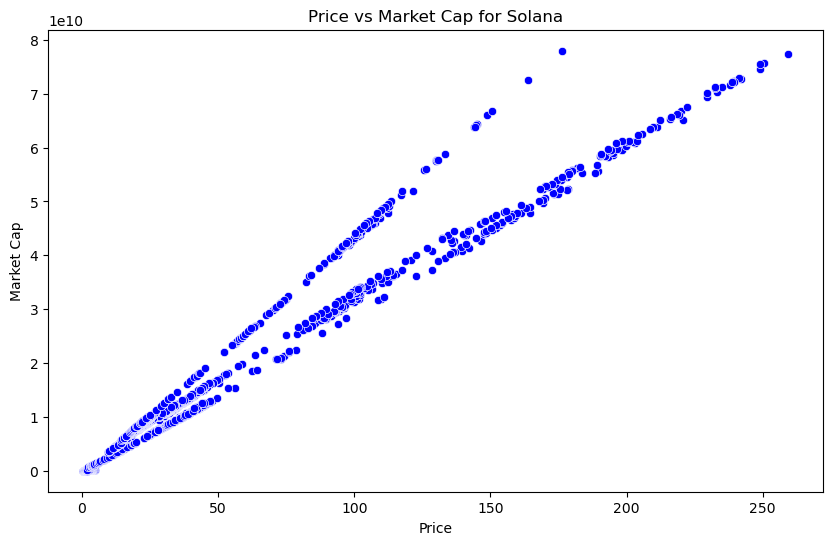

In [21]:
# Scatter plot for Price vs Total Volume for Solana
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sol_data, x='price', y='total_volume', color='red')
plt.title('Price vs Total Volume for Solana')
plt.xlabel('Price')
plt.ylabel('Total Volume')
plt.show()

# Scatter plot for Market Cap vs Total Volume for Solana
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sol_data, x='market_cap', y='total_volume', color='green')
plt.title('Market Cap vs Total Volume for Solana')
plt.xlabel('Market Cap')
plt.ylabel('Total Volume')
plt.show()

# Scatter plot for Price vs Market Cap for Solana
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sol_data, x='price', y='market_cap', color='blue')
plt.title('Price vs Market Cap for Solana')
plt.xlabel('Price')
plt.ylabel('Market Cap')
plt.show()


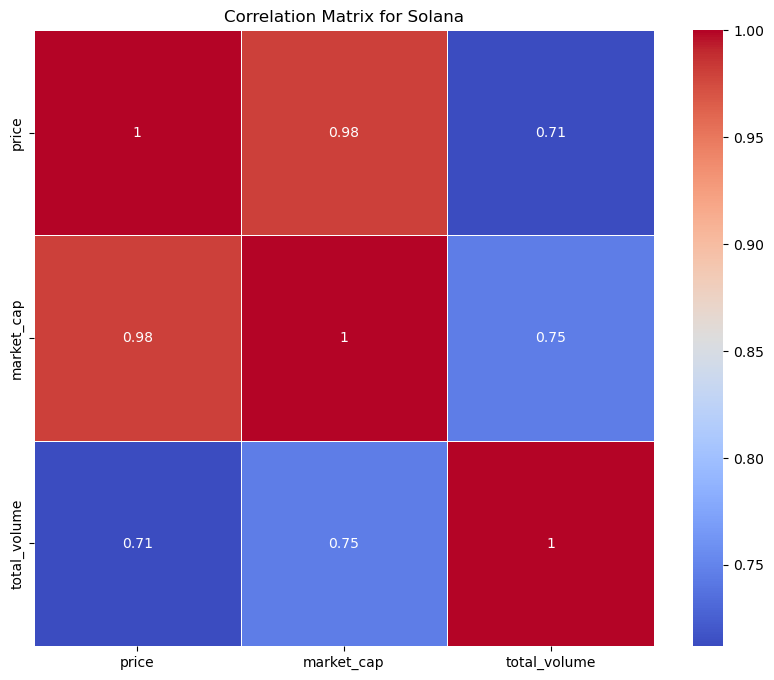

In [22]:
sol_data['snapped_at'] = pd.to_datetime(sol_data['snapped_at'])

# Correlation matrix for Solana
corr_matrix_solana = sol_data[['price', 'market_cap', 'total_volume']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_solana, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Solana')
plt.show()


## Orca

In [23]:
import pandas as pd

# Load the Orca dataset
orca_data = pd.read_csv('orca-usd-max.csv')

# Display the first few rows of the dataset
print("Orca Dataset:")
print(orca_data.head())

# Check the structure of the dataset
print("\nStructure of Orca Dataset:")
print(orca_data.info())

# Check for missing values
print("\nMissing Values in Orca Dataset:")
print(orca_data.isnull().sum())

# Summary statistics
print("\nSummary Statistics for Orca Dataset:")
print(orca_data.describe())


Orca Dataset:
                snapped_at     price    market_cap  total_volume
0  2021-08-10 00:00:00 UTC  3.290684  1.735225e+07  6.039985e+05
1  2021-08-11 00:00:00 UTC  3.290684  1.735225e+07  6.039985e+05
2  2021-08-12 00:00:00 UTC  2.711477  1.567188e+07  2.560448e+05
3  2021-08-13 00:00:00 UTC  2.702673  1.417384e+07  1.207527e+05
4  2021-08-14 00:00:00 UTC  2.670641  1.402847e+07  1.114745e+06

Structure of Orca Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    950 non-null    object 
 1   price         950 non-null    float64
 2   market_cap    950 non-null    float64
 3   total_volume  950 non-null    float64
dtypes: float64(3), object(1)
memory usage: 29.8+ KB
None

Missing Values in Orca Dataset:
snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64

Summary Statistics for Orca D

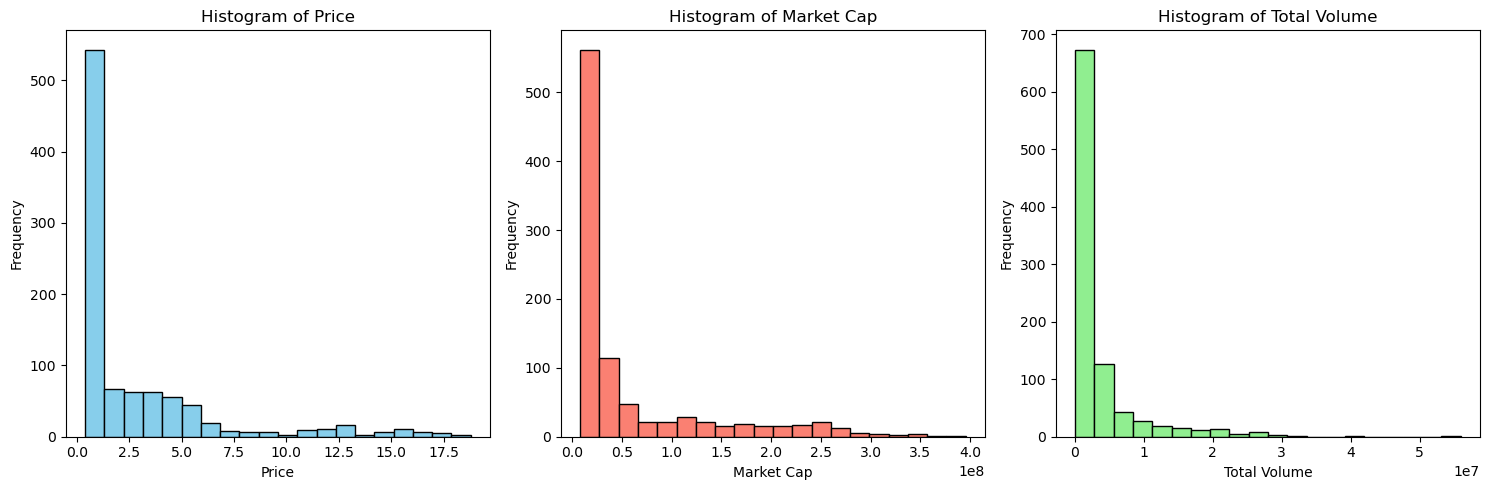

In [24]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
plt.figure(figsize=(15, 5))

# Histogram for Price
plt.subplot(1, 3, 1)
plt.hist(orca_data['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for Market Cap
plt.subplot(1, 3, 2)
plt.hist(orca_data['market_cap'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Market Cap')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')

# Histogram for Total Volume
plt.subplot(1, 3, 3)
plt.hist(orca_data['total_volume'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


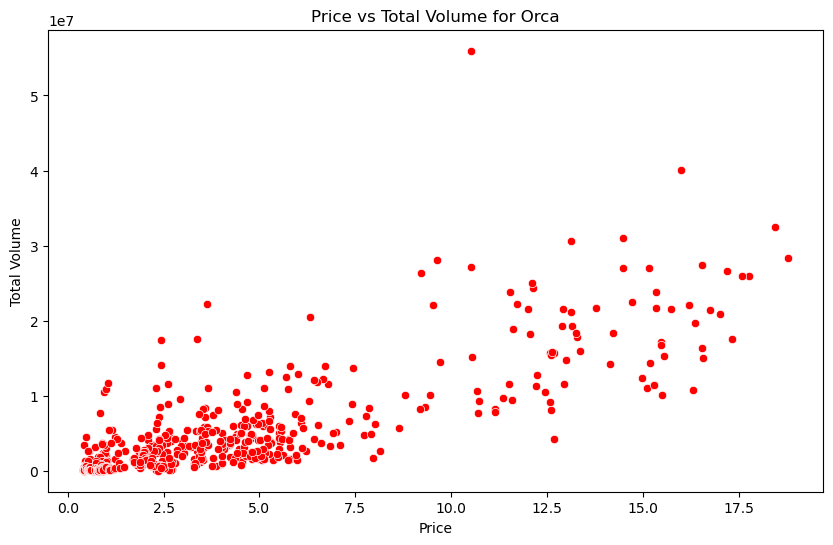

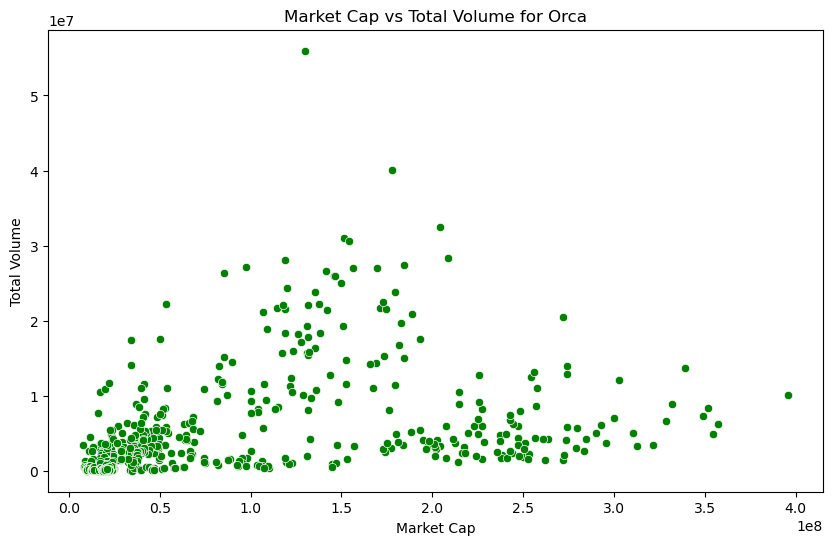

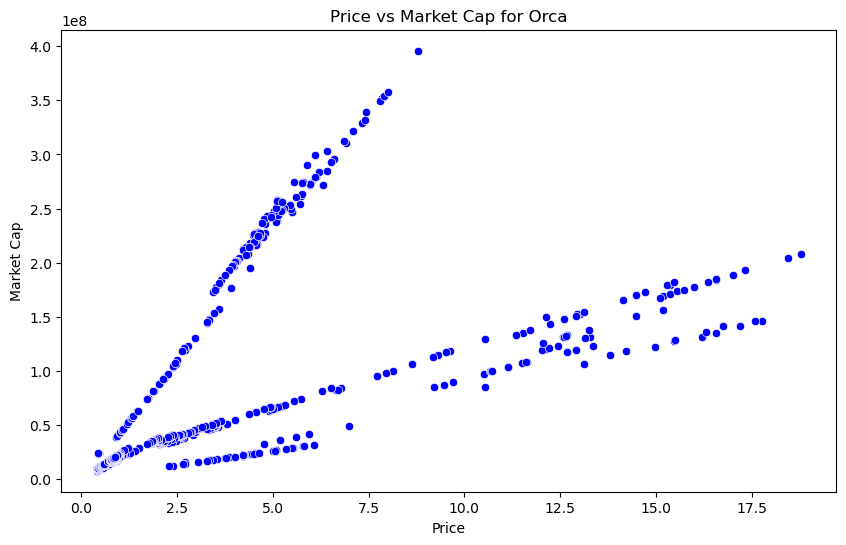

In [25]:
# Scatter plot for Price vs Total Volume for Orca
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orca_data, x='price', y='total_volume', color='red')
plt.title('Price vs Total Volume for Orca')
plt.xlabel('Price')
plt.ylabel('Total Volume')
plt.show()

# Scatter plot for Market Cap vs Total Volume for Orca
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orca_data, x='market_cap', y='total_volume', color='green')
plt.title('Market Cap vs Total Volume for Orca')
plt.xlabel('Market Cap')
plt.ylabel('Total Volume')
plt.show()

# Scatter plot for Price vs Market Cap for Orca
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orca_data, x='price', y='market_cap', color='blue')
plt.title('Price vs Market Cap for Orca')
plt.xlabel('Price')
plt.ylabel('Market Cap')
plt.show()


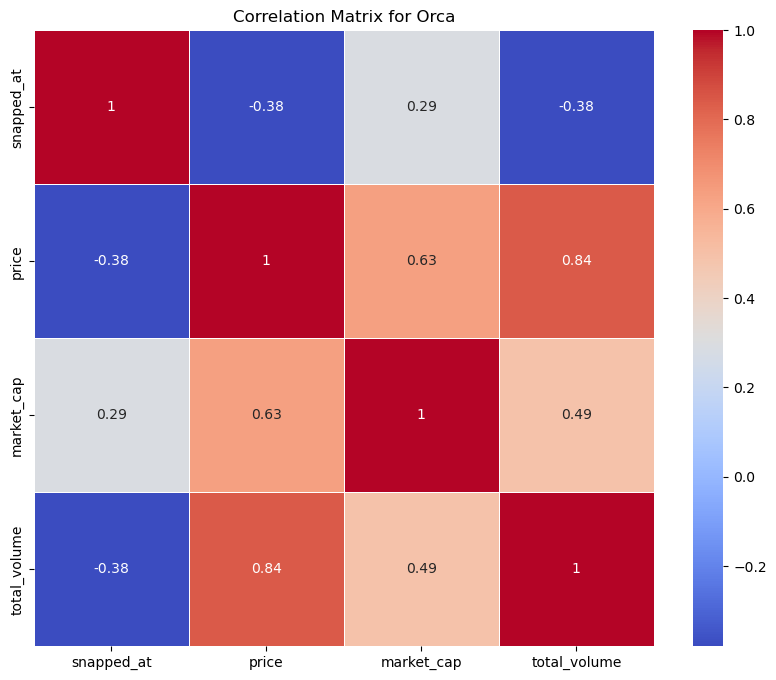

In [26]:
# Convert 'snapped_at' column to datetime format
orca_data['snapped_at'] = pd.to_datetime(orca_data['snapped_at'])

# Correlation matrix for Orca
corr_matrix_orca = orca_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_orca, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Orca')
plt.show()

## Uniswap

In [27]:
# Load the Uniswap dataset
uni_data = pd.read_csv('Uni-usd-max.csv')

# Display the first few rows of the dataset
print("Uniswap Dataset:")
print(uni_data.head())

# Check the structure of the dataset
print("\nStructure of Uniswap Dataset:")
print(uni_data.info())

# Check for missing values
print("\nMissing Values in Uniswap Dataset:")
print(uni_data.isnull().sum())

# Summary statistics
print("\nSummary Statistics for Uniswap Dataset:")
print(uni_data.describe())

Uniswap Dataset:
                snapped_at     price    market_cap  total_volume
0  2020-09-17 00:00:00 UTC  3.443832  2.199132e+08  1.802085e+09
1  2020-09-18 00:00:00 UTC  3.443832  2.199132e+08  1.802085e+09
2  2020-09-19 00:00:00 UTC  7.097694  7.328221e+08  5.688408e+09
3  2020-09-20 00:00:00 UTC  5.702061  6.472084e+08  2.050756e+09
4  2020-09-21 00:00:00 UTC  5.256579  6.324213e+08  1.316669e+09

Structure of Uniswap Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    1277 non-null   object 
 1   price         1277 non-null   float64
 2   market_cap    1277 non-null   float64
 3   total_volume  1277 non-null   float64
dtypes: float64(3), object(1)
memory usage: 40.0+ KB
None

Missing Values in Uniswap Dataset:
snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64

Summary Statistics

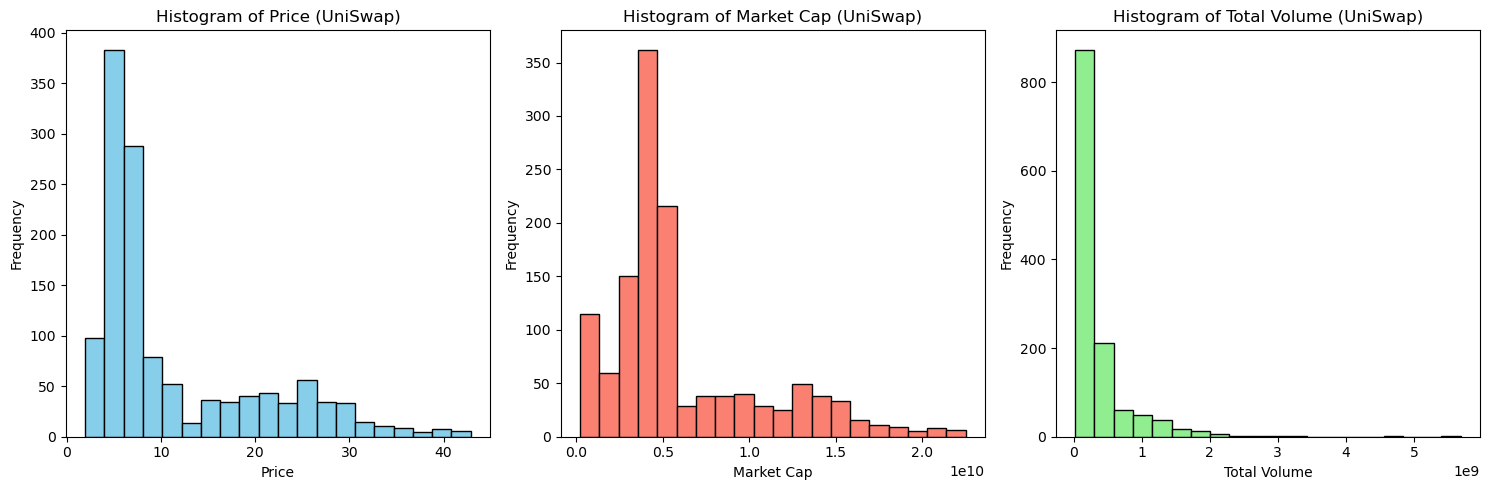

In [28]:
# Plot histograms for numerical features in UniSwap dataset
plt.figure(figsize=(15, 5))

# Histogram for Price in UniSwap dataset
plt.subplot(1, 3, 1)
plt.hist(uni_data['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price (UniSwap)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for Market Cap in UniSwap dataset
plt.subplot(1, 3, 2)
plt.hist(uni_data['market_cap'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Market Cap (UniSwap)')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')

# Histogram for Total Volume in UniSwap dataset
plt.subplot(1, 3, 3)
plt.hist(uni_data['total_volume'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Total Volume (UniSwap)')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

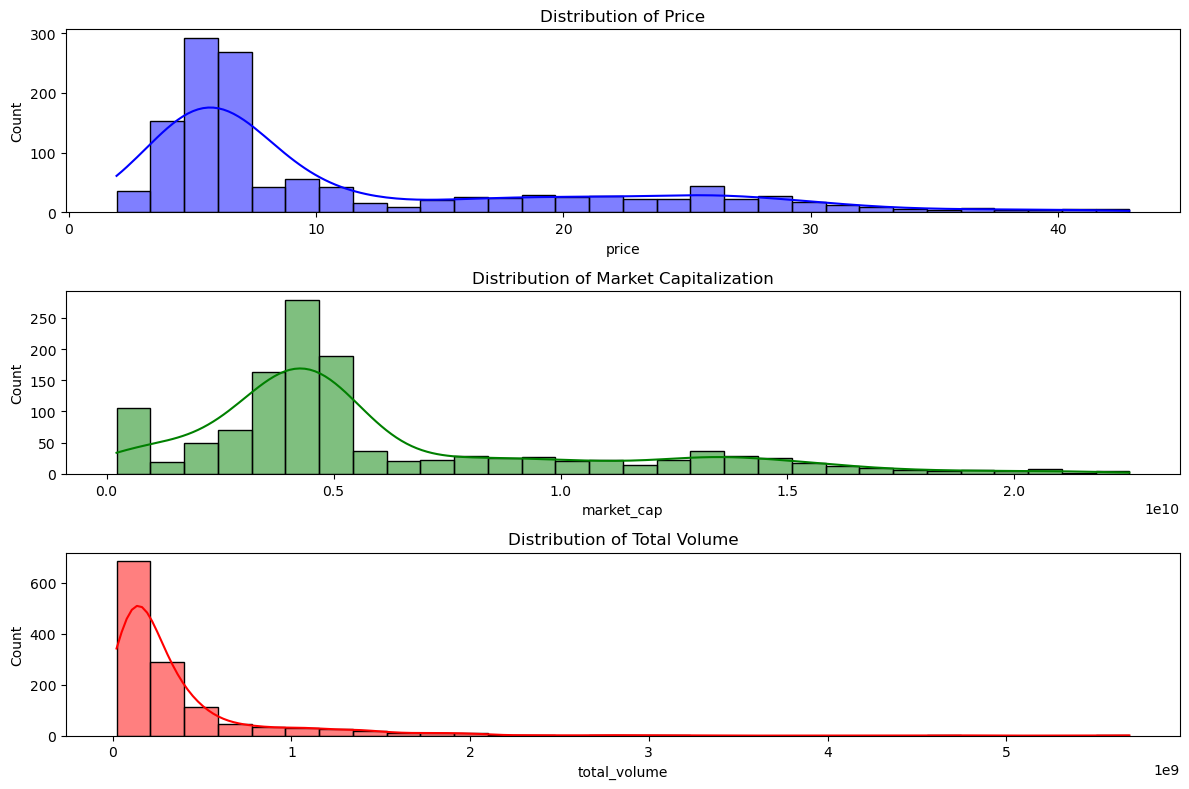

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for price, market capitalization, and total volume
plt.figure(figsize=(12, 8))

# Histogram for Price
plt.subplot(3, 1, 1)
sns.histplot(uni_data['price'], bins=30, color='blue', kde=True)
plt.title('Distribution of Price')

# Histogram for Market Capitalization
plt.subplot(3, 1, 2)
sns.histplot(uni_data['market_cap'], bins=30, color='green', kde=True)
plt.title('Distribution of Market Capitalization')

# Histogram for Total Volume
plt.subplot(3, 1, 3)
sns.histplot(uni_data['total_volume'], bins=30, color='red', kde=True)
plt.title('Distribution of Total Volume')

plt.tight_layout()
plt.show()


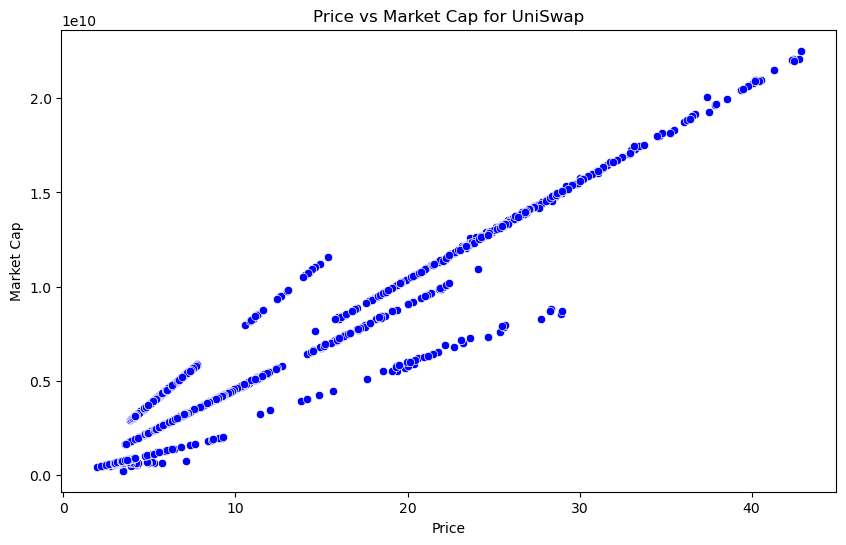

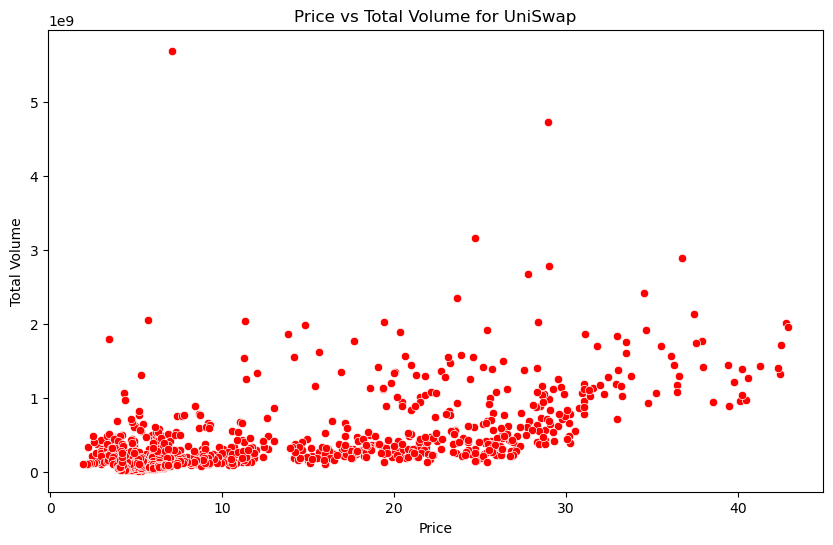

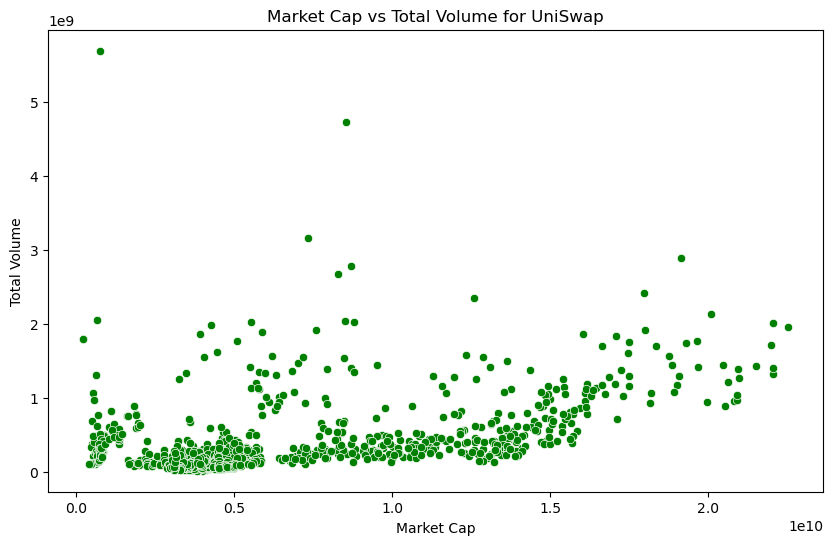

In [30]:
# Scatter plot for Price vs Market Cap
plt.figure(figsize=(10, 6))
sns.scatterplot(data=uni_data, x='price', y='market_cap', color='blue')
plt.title('Price vs Market Cap for UniSwap')
plt.xlabel('Price')
plt.ylabel('Market Cap')
plt.show()

# Scatter plot for Price vs Total Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=uni_data, x='price', y='total_volume', color='red')
plt.title('Price vs Total Volume for UniSwap')
plt.xlabel('Price')
plt.ylabel('Total Volume')
plt.show()

# Scatter plot for Market Cap vs Total Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=uni_data, x='market_cap', y='total_volume', color='green')
plt.title('Market Cap vs Total Volume for UniSwap')
plt.xlabel('Market Cap')
plt.ylabel('Total Volume')
plt.show()


snapped_at      datetime64[ns, UTC]
price                       float64
market_cap                  float64
total_volume                float64
dtype: object


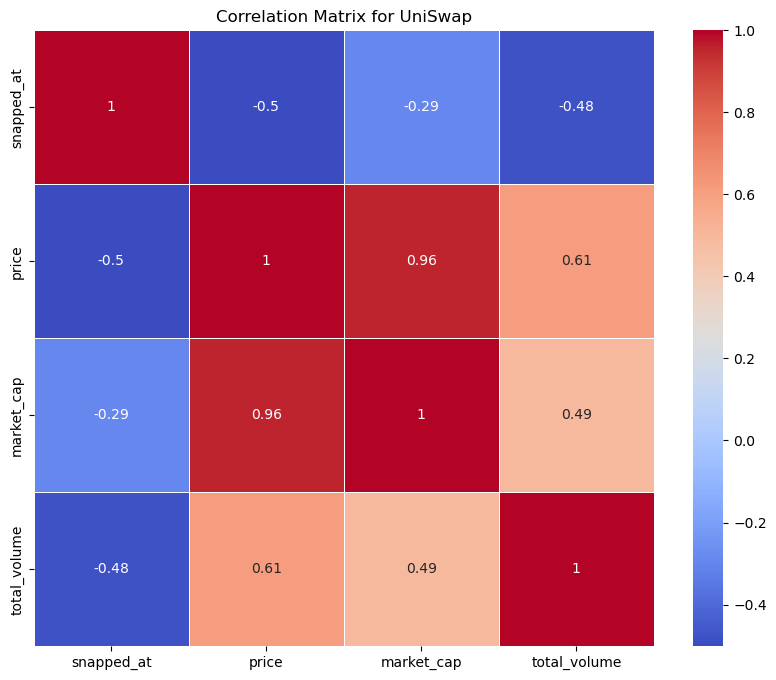

In [31]:
# Convert 'snapped_at' column to datetime format
uni_data['snapped_at'] = pd.to_datetime(uni_data['snapped_at'])

# Check the data types to confirm the conversion
print(uni_data.dtypes)


# Correlation matrix
corr_matrix_uni = uni_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_uni, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for UniSwap')
plt.show()


## JUP

In [32]:
# Load the JUP dataset
jup_data = pd.read_csv('JUP-usd-max.csv')

# Display the first few rows of the dataset
print("\nJUP Dataset:")
print(jup_data.head())

# Check the structure of the dataset
print("\nStructure of JUP Dataset:")
print(jup_data.info())

# Check for missing values
print("\nMissing Values in JUP Dataset:")
print(jup_data.isnull().sum())

# Summary statistics
print("\nSummary Statistics for JUP Dataset:")
print(jup_data.describe())


JUP Dataset:
                snapped_at     price    market_cap  total_volume
0  2024-01-31 00:00:00 UTC  0.662562  8.999919e+08  5.109083e+08
1  2024-02-01 00:00:00 UTC  0.662562  8.999919e+08  5.109083e+08
2  2024-02-02 00:00:00 UTC  0.598275  7.981273e+08  3.870627e+08
3  2024-02-03 00:00:00 UTC  0.616372  8.343642e+08  3.988492e+08
4  2024-02-04 00:00:00 UTC  0.568014  7.676758e+08  2.593055e+08

Structure of JUP Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    46 non-null     object 
 1   price         46 non-null     float64
 2   market_cap    46 non-null     float64
 3   total_volume  46 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB
None

Missing Values in JUP Dataset:
snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64

Summary Statistics for JUP Dataset

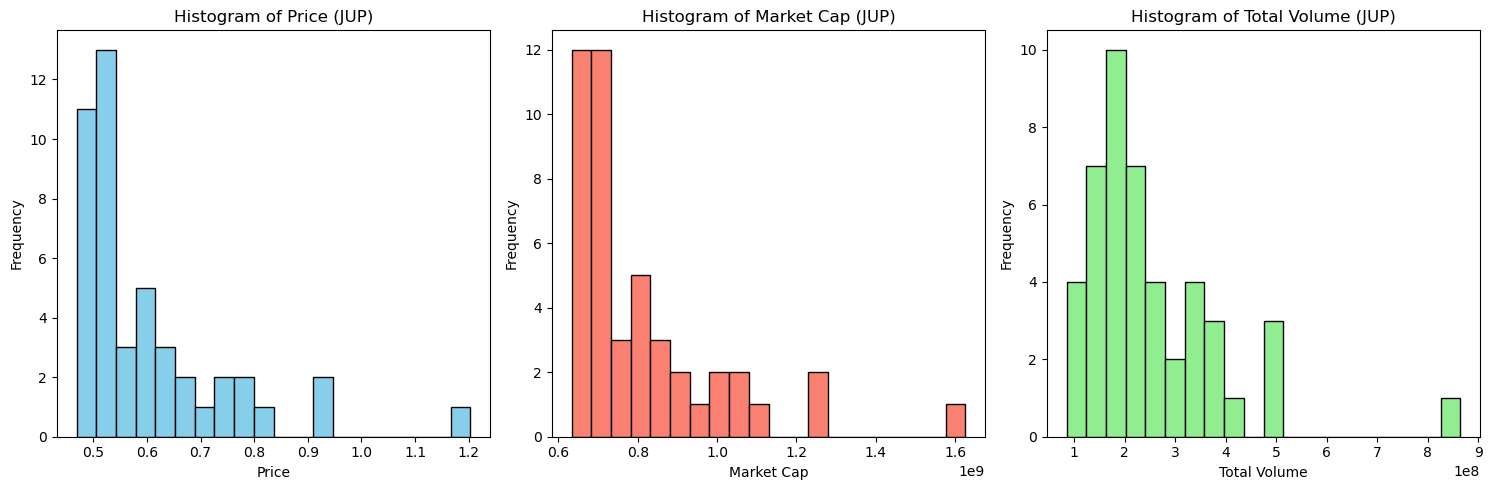

In [33]:
# Plot histograms for numerical features in JUP dataset
plt.figure(figsize=(15, 5))

# Histogram for Price in JUP dataset
plt.subplot(1, 3, 1)
plt.hist(jup_data['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price (JUP)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for Market Cap in JUP dataset
plt.subplot(1, 3, 2)
plt.hist(jup_data['market_cap'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Market Cap (JUP)')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')

# Histogram for Total Volume in JUP dataset
plt.subplot(1, 3, 3)
plt.hist(jup_data['total_volume'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Total Volume (JUP)')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Preparing the Data

In [1]:
import pandas as pd

# Load Uniswap data
uniswap_data = pd.read_csv("uni-usd-max.csv")

# Load Orca data
orca_data = pd.read_csv("orca-usd-max.csv")

# Load JUP data
jup_data = pd.read_csv("JUP-usd-max.csv")

# Convert 'snapped_at' column to timestamp data type
uniswap_data['snapped_at'] = pd.to_datetime(uniswap_data['snapped_at'])
orca_data['snapped_at'] = pd.to_datetime(orca_data['snapped_at'])
jup_data['snapped_at'] = pd.to_datetime(jup_data['snapped_at'])

# Define the start and end dates for Uniswap
uniswap_start_date = pd.Timestamp("2020-09-17", tz="UTC")
uniswap_end_date = uniswap_start_date + pd.Timedelta(days=45)

# Define the start and end dates for Orca
orca_start_date = pd.Timestamp("2021-08-10", tz="UTC")
orca_end_date = orca_start_date + pd.Timedelta(days=45)

# Define the start and end dates for JUP
jup_start_date = pd.Timestamp("2024-01-31", tz="UTC")
jup_end_date = pd.Timestamp("2024-03-16", tz="UTC")




In [2]:
uniswap_data.info()
orca_data.info()
jup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   snapped_at    1277 non-null   datetime64[ns, UTC]
 1   price         1277 non-null   float64            
 2   market_cap    1277 non-null   float64            
 3   total_volume  1277 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 40.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   snapped_at    950 non-null    datetime64[ns, UTC]
 1   price         950 non-null    float64            
 2   market_cap    950 non-null    float64            
 3   total_volume  950 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 29.8 KB


In [3]:
# Extract data within the specified time window for Uniswap
uniswap_data_window = uniswap_data[(uniswap_data['snapped_at'] >= uniswap_start_date) & (uniswap_data['snapped_at'] <= uniswap_end_date)]

# Extract data within the specified time window for Orca
orca_data_window = orca_data[(orca_data['snapped_at'] >= orca_start_date) & (orca_data['snapped_at'] <= orca_end_date)]

# Extract data within the specified time window for JUP
jup_data_window = jup_data[(jup_data['snapped_at'] >= jup_start_date) & (jup_data['snapped_at'] <= jup_end_date)]


## Investigating Cryptocurrency infancy

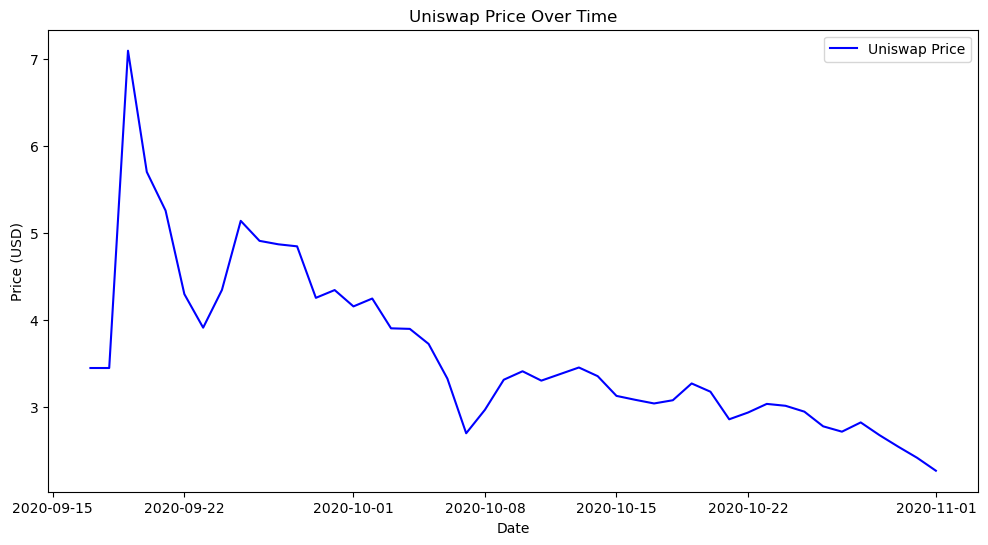

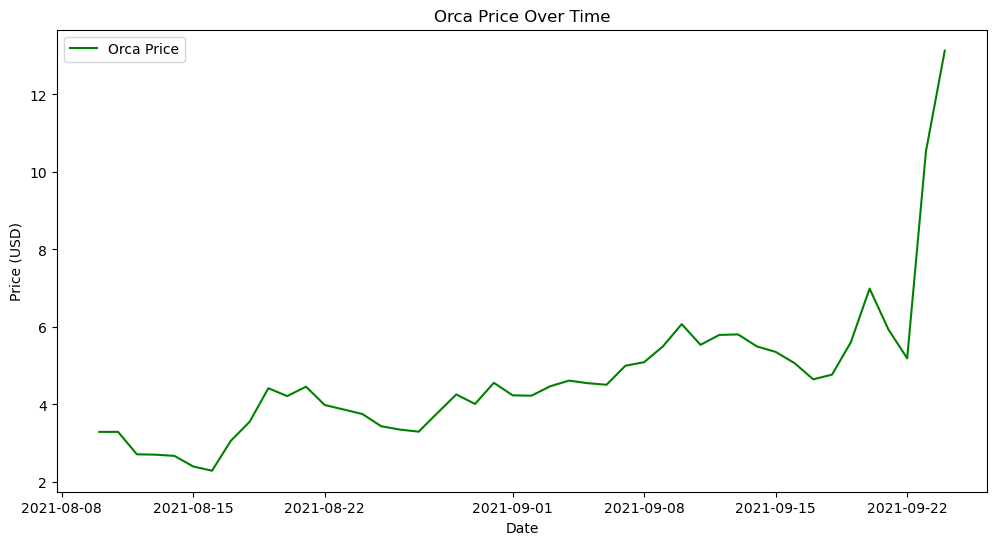

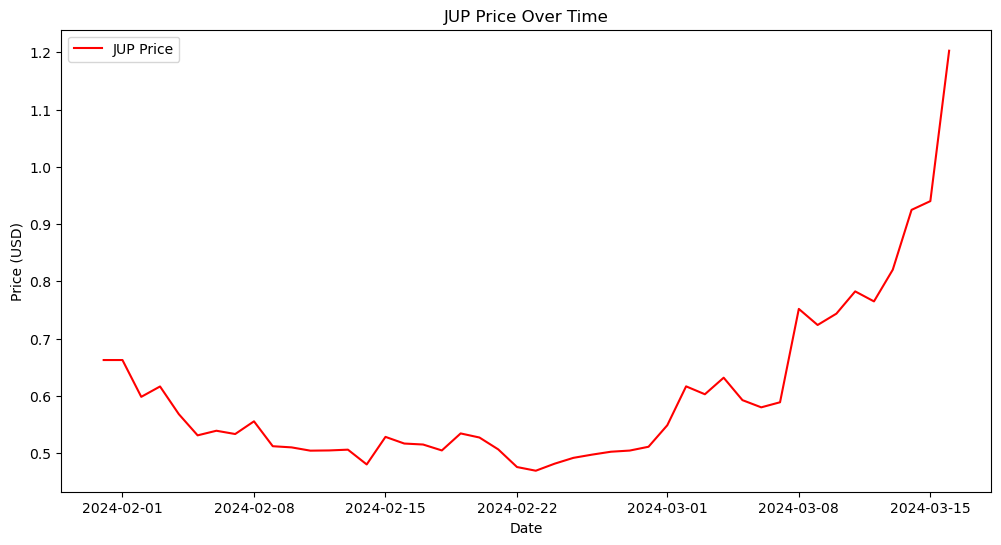

In [4]:
import matplotlib.pyplot as plt

# Visualize Uniswap data
plt.figure(figsize=(12, 6))
plt.plot(uniswap_data_window['snapped_at'], uniswap_data_window['price'], label='Uniswap Price', color='blue')
plt.title('Uniswap Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Visualize Orca data
plt.figure(figsize=(12, 6))
plt.plot(orca_data_window['snapped_at'], orca_data_window['price'], label='Orca Price', color='green')
plt.title('Orca Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Visualize JUP data
plt.figure(figsize=(12, 6))
plt.plot(jup_data_window['snapped_at'], jup_data_window['price'], label='JUP Price', color='red')
plt.title('JUP Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


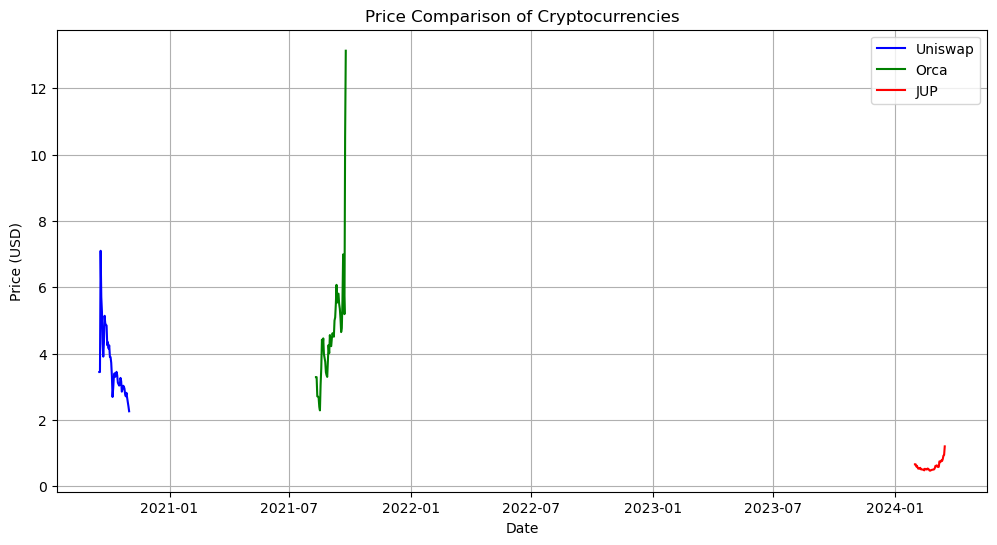

In [5]:
# Visualize price comparison of all three cryptocurrencies
plt.figure(figsize=(12, 6))

plt.plot(uniswap_data_window['snapped_at'], uniswap_data_window['price'], label='Uniswap', color='blue')
plt.plot(orca_data_window['snapped_at'], orca_data_window['price'], label='Orca', color='green')
plt.plot(jup_data_window['snapped_at'], jup_data_window['price'], label='JUP', color='red')

plt.title('Price Comparison of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.show()


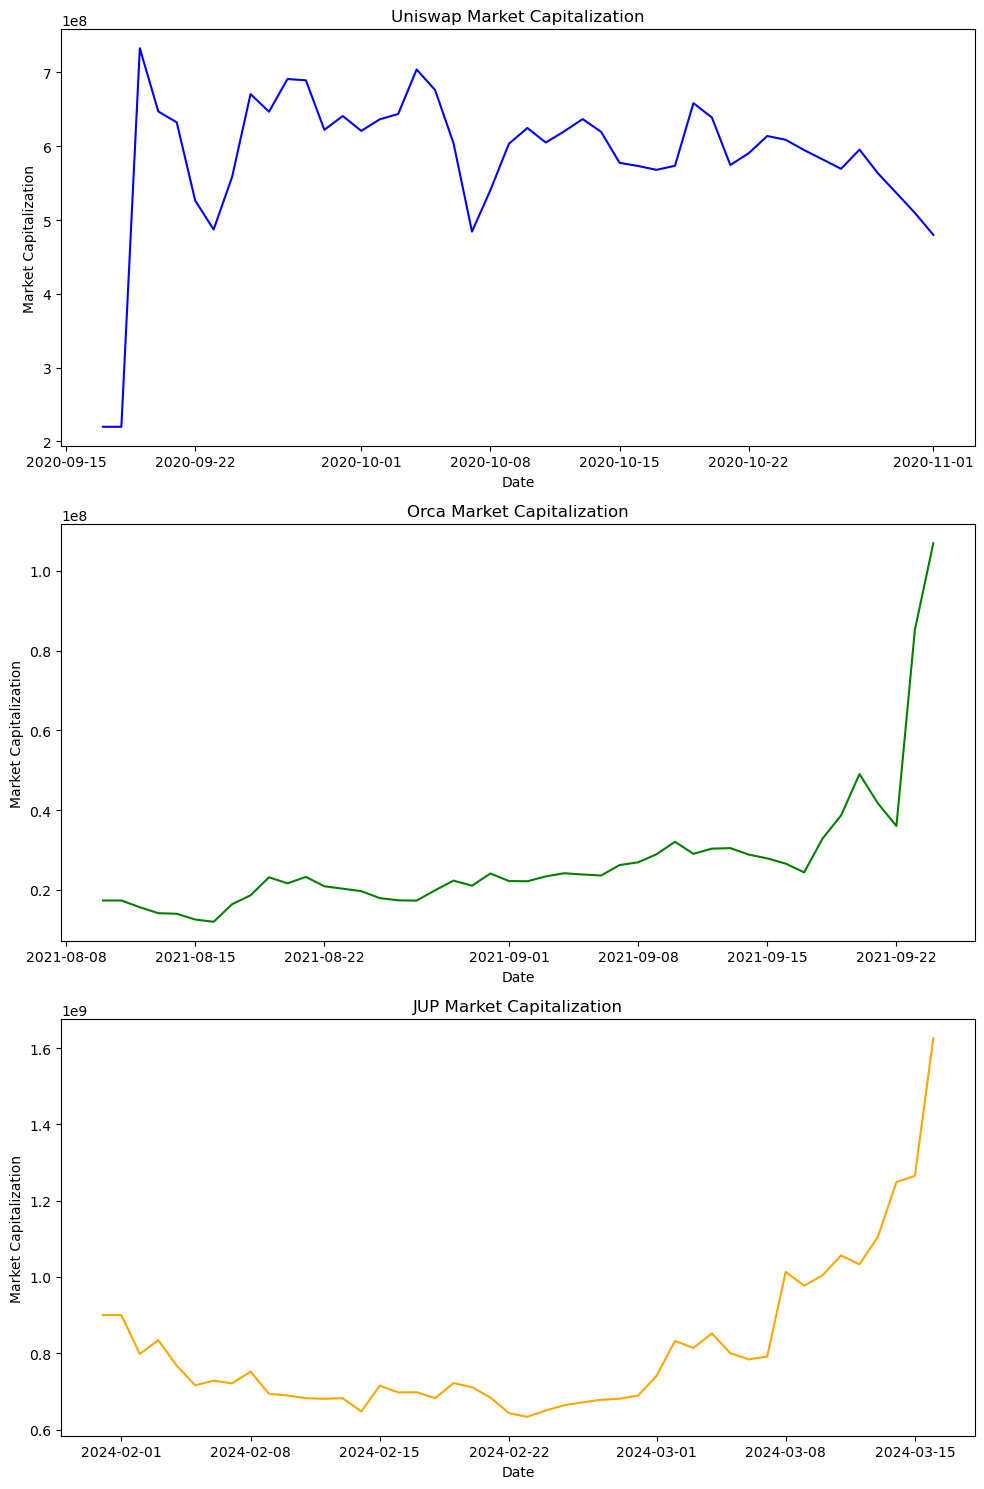

In [6]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot market capitalization for Uniswap
axes[0].plot(uniswap_data_window['snapped_at'], uniswap_data_window['market_cap'], color='blue')
axes[0].set_title('Uniswap Market Capitalization')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Market Capitalization')

# Plot market capitalization for Orca
axes[1].plot(orca_data_window['snapped_at'], orca_data_window['market_cap'], color='green')
axes[1].set_title('Orca Market Capitalization')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Market Capitalization')

# Plot market capitalization for JUP
axes[2].plot(jup_data_window['snapped_at'], jup_data_window['market_cap'], color='orange')
axes[2].set_title('JUP Market Capitalization')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Market Capitalization')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


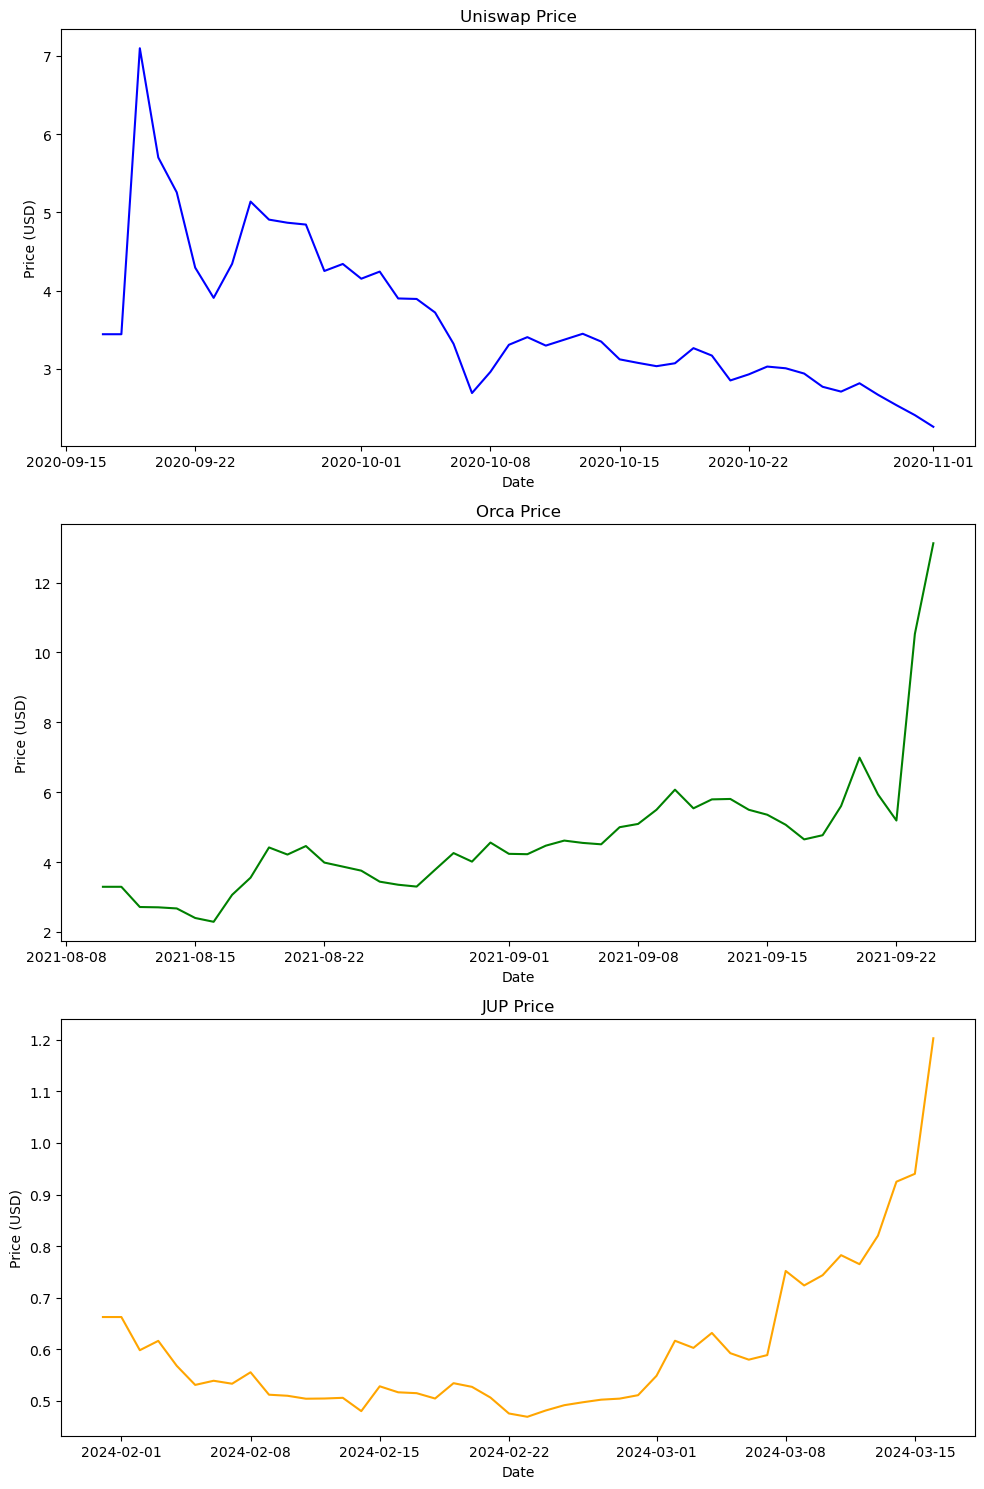

In [7]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot price for Uniswap
axes[0].plot(uniswap_data_window['snapped_at'], uniswap_data_window['price'], color='blue')
axes[0].set_title('Uniswap Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price (USD)')

# Plot price for Orca
axes[1].plot(orca_data_window['snapped_at'], orca_data_window['price'], color='green')
axes[1].set_title('Orca Price')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price (USD)')

# Plot price for JUP
axes[2].plot(jup_data_window['snapped_at'], jup_data_window['price'], color='orange')
axes[2].set_title('JUP Price')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Price (USD)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


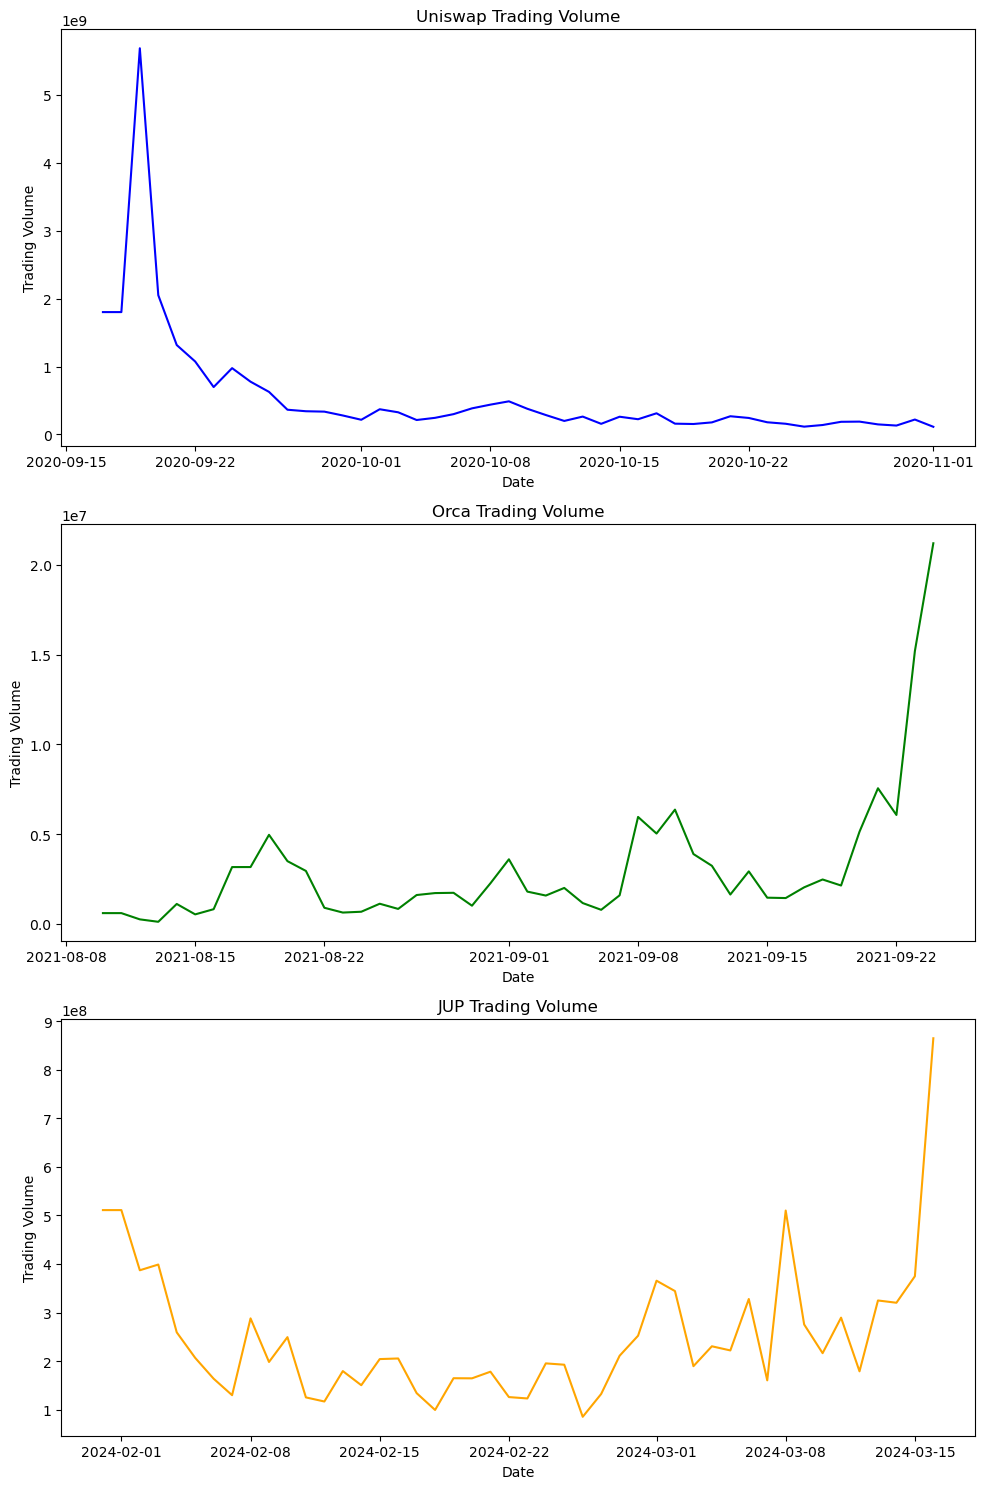

In [8]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot trading volume for Uniswap
axes[0].plot(uniswap_data_window['snapped_at'], uniswap_data_window['total_volume'], color='blue')
axes[0].set_title('Uniswap Trading Volume')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Trading Volume')

# Plot trading volume for Orca
axes[1].plot(orca_data_window['snapped_at'], orca_data_window['total_volume'], color='green')
axes[1].set_title('Orca Trading Volume')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Trading Volume')

# Plot trading volume for JUP
axes[2].plot(jup_data_window['snapped_at'], jup_data_window['total_volume'], color='orange')
axes[2].set_title('JUP Trading Volume')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Trading Volume')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Creating a machine learning algorithm to predict JUP price based on orca and uniswap

## 1
## Predicting the Price of Uniswap (UNI) Using Historical Data and Additional Variables from Uniswap (UNI), Orca (ORCA), and Jupiter (JUP)

In [257]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split

# Load Uniswap data
uniswap_data = pd.read_csv("uni-usd-max.csv")

# Load Orca data
orca_data = pd.read_csv("orca-usd-max.csv")

# Load JUP data
jup_data = pd.read_csv("JUP-usd-max.csv")

# Convert 'snapped_at' column to timestamp data type and remove timezone
uniswap_data['snapped_at'] = pd.to_datetime(uniswap_data['snapped_at']).dt.tz_localize(None)
orca_data['snapped_at'] = pd.to_datetime(orca_data['snapped_at']).dt.tz_localize(None)
jup_data['snapped_at'] = pd.to_datetime(jup_data['snapped_at']).dt.tz_localize(None)

# Merge the datasets for Uniswap, Orca, and JUP based on the timestamp
merged_data = pd.merge(uniswap_data, orca_data, on='snapped_at', how='inner')
merged_data = pd.merge(merged_data, jup_data, on='snapped_at', how='inner')

# Define the features (X) and the target variable (y)
X = merged_data.drop(columns=['price_x'])  # Features (excluding the target variable)
y = merged_data['price_x']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine 'snapped_at' and 'price_x' into a DataFrame for Prophet for training set
prophet_data_train = X_train[['snapped_at']].copy()
prophet_data_train['y'] = y_train.values  # Add the target variable
prophet_data_train.rename(columns={'snapped_at': 'ds'}, inplace=True)

# Combine 'snapped_at' and 'price_x' into a DataFrame for Prophet for testing set
prophet_data_test = X_test[['snapped_at']].copy()
prophet_data_test['y'] = y_test.values  # Add the target variable
prophet_data_test.rename(columns={'snapped_at': 'ds'}, inplace=True)

# Instantiate the Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(prophet_data_train)

# Proceed with further steps such as making predictions or evaluating the model


18:43:35 - cmdstanpy - INFO - Chain [1] start processing
18:43:35 - cmdstanpy - INFO - Chain [1] done processing


In [258]:
# Check for missing values in the merged dataset
merged_data


,snapped_at,price_x,market_cap_x,total_volume_x,price_y,market_cap_y,total_volume_y,price,market_cap,total_volume
0,2024-01-31,6.259800,4.711687e+09,9.259000e+07,5.883468,2.902142e+08,5.019147e+06,0.662562,8.999919e+08,5.109083e+08
1,2024-02-01,5.997856,4.523220e+09,1.060541e+08,4.953844,2.443703e+08,6.237534e+06,0.662562,8.999919e+08,5.109083e+08
2,2024-02-02,6.043764,4.553898e+09,8.629487e+07,4.804208,2.373514e+08,4.831936e+06,0.598275,7.981273e+08,3.870627e+08
3,2024-02-03,6.136098,4.625514e+09,7.441007e+07,4.616161,2.283137e+08,3.879238e+06,0.616372,8.343642e+08,3.988492e+08
4,2024-02-04,6.103826,4.598965e+09,6.061341e+07,4.793391,2.358528e+08,2.482521e+06,0.568014,7.676758e+08,2.593055e+08
5,2024-02-05,5.985344,4.509545e+09,5.097234e+07,4.410529,2.181824e+08,2.441692e+06,0.530981,7.159307e+08,2.067366e+08
6,2024-02-06,6.000089,4.521759e+09,5.721124e+07,4.097126,2.027588e+08,4.122732e+06,0.539041,7.283082e+08,1.638620e+08
7,2024-02-07,6.280766,4.732909e+09,8.659747e+07,3.996281,1.973841e+08,3.365472e+06,0.533297,7.209800e+08,1.299278e+08
8,2024-02-08,6.390414,4.816578e+09,7.527909e+07,4.127818,2.039946e+08,3.267416e+06,0.555487,7.520298e+08,2.880099e+08
9,2024-02-09,6.318868,4.766534e+09,7.216230e+07,4.080480,2.019434e+08,2.879155e+06,0.512000,6.937930e+08,1.983070e+08


Mean Absolute Error (MAE): 5.68983119316214


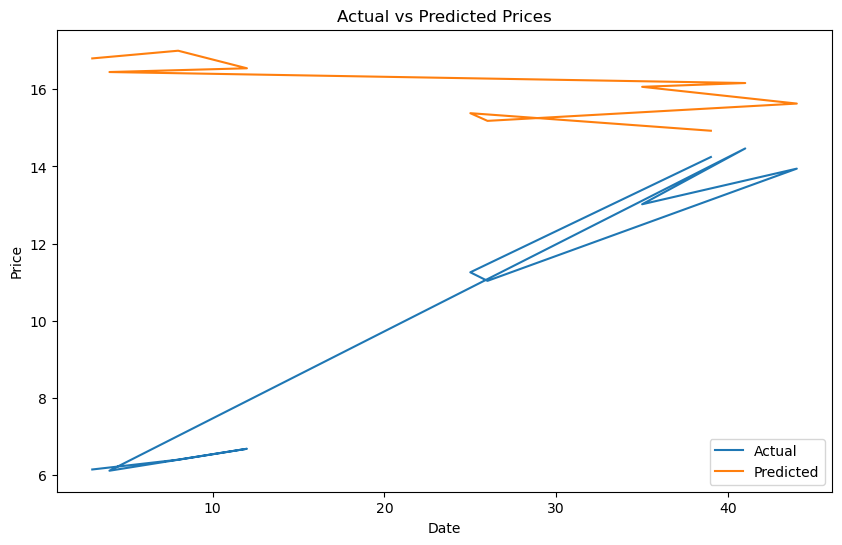

In [259]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Make predictions on the testing set
future = model.make_future_dataframe(periods=len(X_test))
forecast = model.predict(future)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, forecast['yhat'][-len(X_test):])
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast['yhat'][-len(X_test):], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


## 2
#### The  Prophet model trained using this data would be predicting the price of Uniswap (UNI), not JUP. If you want to predict the price of JUP using Prophet, you would need to set y = merged_data['jup_price'] and adjust the dataframe accordingly.

In [9]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split

# Load Uniswap data
uniswap_data = pd.read_csv("uni-usd-max.csv")

# Load Orca data
orca_data = pd.read_csv("orca-usd-max.csv")

# Load JUP data
jup_data = pd.read_csv("JUP-usd-max.csv")

# Convert 'snapped_at' column to timestamp data type and remove timezone
uniswap_data['snapped_at'] = pd.to_datetime(uniswap_data['snapped_at']).dt.tz_localize(None)
orca_data['snapped_at'] = pd.to_datetime(orca_data['snapped_at']).dt.tz_localize(None)
jup_data['snapped_at'] = pd.to_datetime(jup_data['snapped_at']).dt.tz_localize(None)

# Merge the datasets for Uniswap, Orca, and JUP based on the timestamp
merged_data = pd.merge(uniswap_data, orca_data, on='snapped_at', how='inner')
merged_data = pd.merge(merged_data, jup_data, on='snapped_at', how='inner')

# Define the features (X) and the target variable (y)
X = merged_data.drop(columns=['price_x'])  # Features (excluding the target variable)
y = merged_data['price_x']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine 'snapped_at' and 'price_x' into a DataFrame for Prophet for training set
prophet_data_train = X_train[['snapped_at']].copy()
prophet_data_train['y'] = y_train.values  # Add the target variable
prophet_data_train.rename(columns={'snapped_at': 'ds'}, inplace=True)

# Combine 'snapped_at' and 'price_x' into a DataFrame for Prophet for testing set
prophet_data_test = X_test[['snapped_at']].copy()
prophet_data_test['y'] = y_test.values  # Add the target variable
prophet_data_test.rename(columns={'snapped_at': 'ds'}, inplace=True)

# Instantiate the Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(prophet_data_train)

# Proceed with further steps such as making predictions or evaluating the model


C:\Users\Georg\anaconda3\envs\jup_pred\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:00:50 - cmdstanpy - INFO - Chain [1] start processing
15:00:50 - cmdstanpy - INFO - Chain [1] done processing


           ds       yhat  yhat_lower  yhat_upper
41 2024-03-22  16.164936   14.857445   17.527552
42 2024-03-23  16.450265   15.033269   18.012190
43 2024-03-24  16.547666   15.088811   18.005328
44 2024-03-25  17.003365   15.546952   18.449358
45 2024-03-26  16.803891   15.356950   18.305152


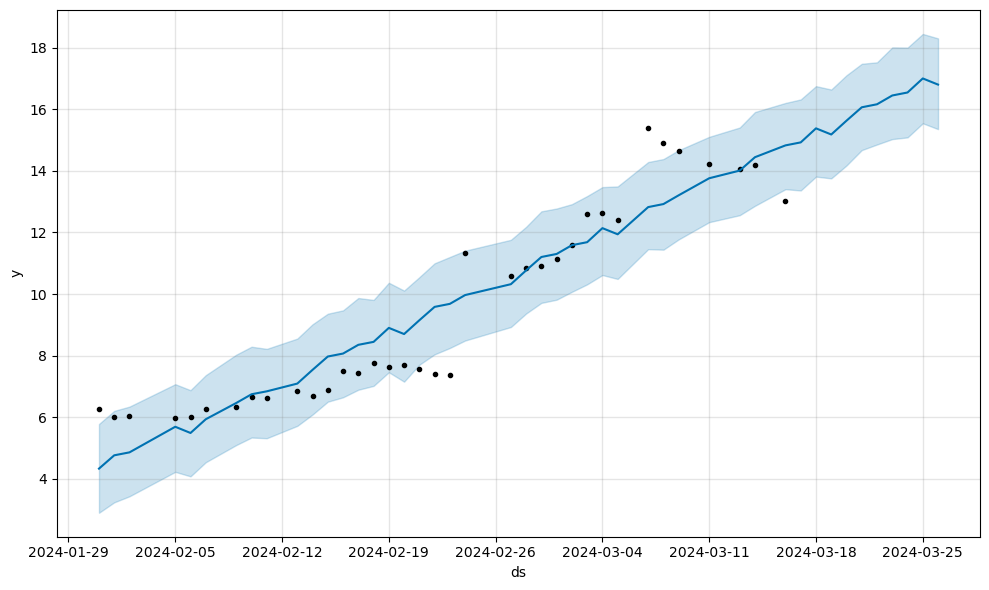

In [10]:
# Make predictions on the testing data
future = model.make_future_dataframe(periods=len(prophet_data_test))
forecast = model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
fig = model.plot(forecast)


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Extract actual prices from the testing set
actual_prices = prophet_data_test['y'].values

# Extract predicted prices from the forecast
predicted_prices = forecast['yhat'].tail(len(prophet_data_test)).values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

# Calculate MAE
mae = mean_absolute_error(actual_prices, predicted_prices)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 6.933717911979711
Mean Absolute Error (MAE): 5.68983119316214


## 4  Predicting JUP Token Price During Infancy Using Features from ORCA and UNI and early jup data - Includes jup price in training data also as a target variable

In [12]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split
import numpy as np

# Load Uniswap data
uniswap_data = pd.read_csv("uni-usd-max.csv")
uniswap_data.rename(columns={'price': 'uni_price', 'total_volume': 'uni_total_volume', 'market_cap': 'uni_market_cap'}, inplace=True)

# Load Orca data
orca_data = pd.read_csv("orca-usd-max.csv")
orca_data.rename(columns={'price': 'orca_price', 'total_volume': 'orca_total_volume', 'market_cap': 'orca_market_cap'}, inplace=True)

# Load JUP data
jup_data = pd.read_csv("JUP-usd-max.csv")
jup_data.rename(columns={'price': 'jup_price', 'total_volume': 'jup_total_volume', 'market_cap': 'jup_market_cap'}, inplace=True)

# Convert 'snapped_at' column to timestamp data type and remove timezone
uniswap_data['snapped_at'] = pd.to_datetime(uniswap_data['snapped_at']).dt.tz_localize(None)
orca_data['snapped_at'] = pd.to_datetime(orca_data['snapped_at']).dt.tz_localize(None)
jup_data['snapped_at'] = pd.to_datetime(jup_data['snapped_at']).dt.tz_localize(None)

# Merge the datasets for Uniswap, Orca, and JUP based on the timestamp (concatenate along axis 1)
merged_data = pd.concat([uniswap_data, orca_data, jup_data], axis=1)

# Define the features (X) and the target variable (y)
X = merged_data[['uni_price', 'uni_total_volume', 'uni_market_cap', 
                 'orca_price', 'orca_total_volume', 'orca_market_cap', 
                 'jup_price', 'jup_total_volume', 'jup_market_cap']]  # Features
y = merged_data['jup_price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine 'snapped_at' and 'price' into a DataFrame for Prophet for training set
prophet_data_train = pd.DataFrame({
    'ds': jup_data['snapped_at'],  # Use 'snapped_at' as timestamps
    'y': jup_data['jup_price']      # 'jup_price' as the target variable
})

# Instantiate the Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(prophet_data_train)

# Make future predictions
future = model.make_future_dataframe(periods=60)  # Predict for 365 days into the future
forecast = model.predict(future)

# Display the forecasted prices
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


15:02:53 - cmdstanpy - INFO - Chain [1] start processing
15:02:53 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
101 2024-05-11  2.506590    2.118514    2.884463
102 2024-05-12  2.483856    2.085632    2.867549
103 2024-05-13  2.513343    2.106803    2.898222
104 2024-05-14  2.523510    2.102607    2.926418
105 2024-05-15  2.556308    2.114505    2.971560


In [13]:
# Calculate the Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate the Root Mean Squared Error (RMSE)
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calculate the Mean Absolute Error (MAE)
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Assuming y_test contains the actual JUP prices for the test set
# Assuming forecast['yhat'] contains the predicted JUP prices
mape = calculate_mape(y_test, forecast['yhat'][-len(y_test):])
rmse = calculate_rmse(y_test, forecast['yhat'][-len(y_test):])
mae = calculate_mae(y_test, forecast['yhat'][-len(y_test):])

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))


Mean Absolute Percentage Error (MAPE): 5.08%
Root Mean Squared Error (RMSE): 0.04
Mean Absolute Error (MAE): 0.03


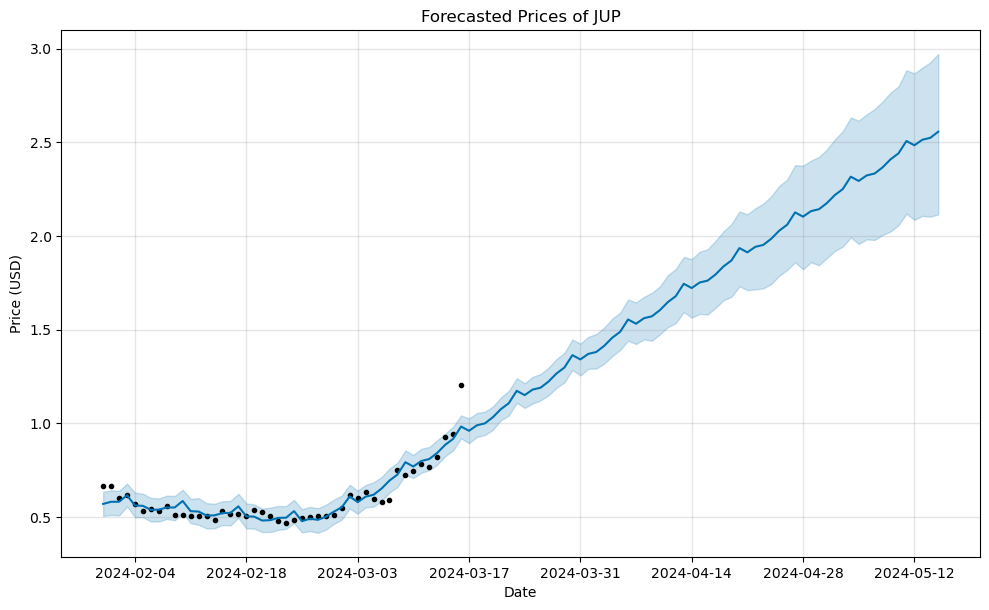

In [14]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasted Prices of JUP')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


In [15]:
print(prophet_data_train.head())


          ds         y
0 2024-01-31  0.662562
1 2024-02-01  0.662562
2 2024-02-02  0.598275
3 2024-02-03  0.616372
4 2024-02-04  0.568014


In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   snapped_at         1277 non-null   datetime64[ns]
 1   uni_price          1277 non-null   float64       
 2   uni_market_cap     1277 non-null   float64       
 3   uni_total_volume   1277 non-null   float64       
 4   snapped_at         950 non-null    datetime64[ns]
 5   orca_price         950 non-null    float64       
 6   orca_market_cap    950 non-null    float64       
 7   orca_total_volume  950 non-null    float64       
 8   snapped_at         46 non-null     datetime64[ns]
 9   jup_price          46 non-null     float64       
 10  jup_market_cap     46 non-null     float64       
 11  jup_total_volume   46 non-null     float64       
dtypes: datetime64[ns](3), float64(9)
memory usage: 119.8 KB


## 5 
#### Perdicting JUP forecast using Features namely JUP marketcap and volume, Orca marketcap volume and price, uni marketcap volume and price

45 fields 

In [17]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split

# Load Uniswap data
uni_data = pd.read_csv("uni-usd-max.csv")
uni_data.rename(columns={'price': 'uni_price', 'total_volume': 'uni_total_volume', 'market_cap': 'uni_market_cap'}, inplace=True)

# Load Orca data
orca_data = pd.read_csv("orca-usd-max.csv")
orca_data.rename(columns={'price': 'orca_price', 'total_volume': 'orca_total_volume', 'market_cap': 'orca_market_cap'}, inplace=True)

# Load JUP data
jup_data = pd.read_csv("JUP-usd-max.csv")
jup_data.rename(columns={'price': 'jup_price', 'total_volume': 'jup_total_volume', 'market_cap': 'jup_market_cap'}, inplace=True)

# Convert 'snapped_at' column to timestamp data type and remove timezone
uni_data['snapped_at'] = pd.to_datetime(uni_data['snapped_at']).dt.tz_localize(None)
orca_data['snapped_at'] = pd.to_datetime(orca_data['snapped_at']).dt.tz_localize(None)
jup_data['snapped_at'] = pd.to_datetime(jup_data['snapped_at']).dt.tz_localize(None)

# Merge Uniswap and Orca datasets based on the timestamp
merged_data = pd.merge(uni_data, orca_data, on='snapped_at', how='inner')

# Use a smaller portion of the JUP dataset (e.g., first 100 rows)
jup_data_subset = jup_data.iloc[:46]

# Merge Uni/Orca data with the subset of JUP data based on the timestamp
merged_data = pd.merge(merged_data, jup_data_subset, on='snapped_at', how='inner')

# Define the features (X) and the target variable (y)
# Include price, total volume, and market cap of Uni, Orca, and JUP except JUP price
X = merged_data[['uni_price', 'uni_total_volume', 'uni_market_cap', 
                 'orca_price', 'orca_total_volume', 'orca_market_cap',
                 'jup_total_volume', 'jup_market_cap']]  
y = merged_data['jup_price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine 'snapped_at' and 'jup_price' into a DataFrame for Prophet for training set
prophet_data_train = pd.DataFrame({
    'ds': jup_data_subset['snapped_at'],  # Use 'snapped_at' as timestamps
    'y': jup_data_subset['jup_price']      # 'jup_price' as the target variable
})

# Instantiate the Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(prophet_data_train)

# Make future predictions
future = model.make_future_dataframe(periods=60)  # Predict for 365 days into the future
forecast = model.predict(future)

# Display the forecasted prices
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


15:03:00 - cmdstanpy - INFO - Chain [1] start processing
15:03:00 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
101 2024-05-11  2.506590    2.102062    2.941224
102 2024-05-12  2.483856    2.071654    2.939680
103 2024-05-13  2.513343    2.083639    2.968166
104 2024-05-14  2.523510    2.092767    2.996460
105 2024-05-15  2.556308    2.097263    3.042993


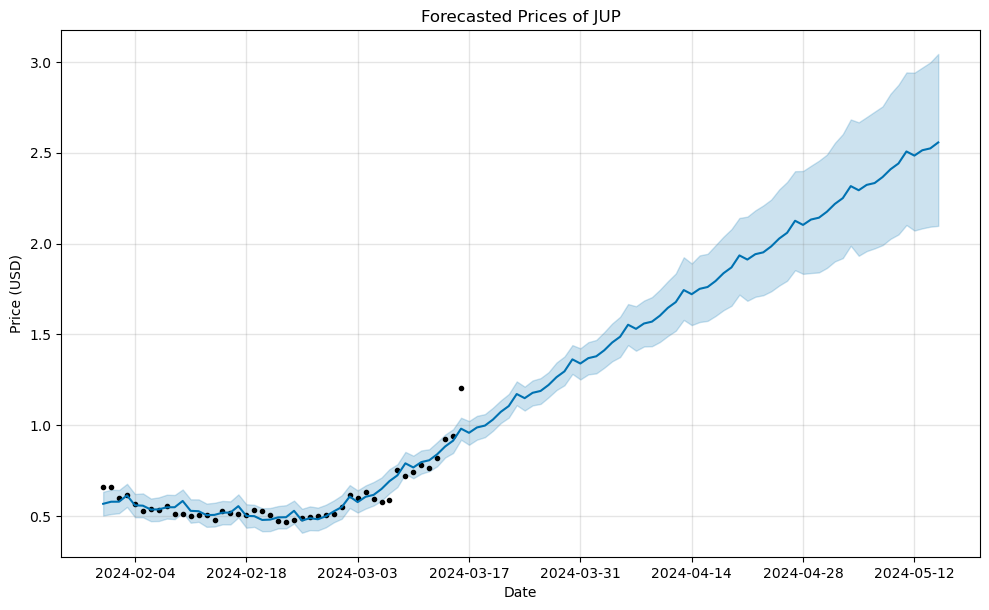

In [18]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasted Prices of JUP')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Extract actual values from the test set
actual_values = y_test.values

# Extract predicted values from the forecast
predicted_values = forecast['yhat'].tail(len(actual_values)).values

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 1.8266950825454347
Mean Absolute Error (MAE): 1.8192009099242017


## WITH MORE DATA

In [20]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split

# Load Uniswap data
uni_data = pd.read_csv("uni-usd-max2.csv")
uni_data.rename(columns={'price': 'uni_price', 'total_volume': 'uni_total_volume', 'market_cap': 'uni_market_cap'}, inplace=True)

# Load Orca data
orca_data = pd.read_csv("orca-usd-max2.csv")
orca_data.rename(columns={'price': 'orca_price', 'total_volume': 'orca_total_volume', 'market_cap': 'orca_market_cap'}, inplace=True)

# Load JUP data
jup_data = pd.read_csv("JUP-usd-max2.csv")
jup_data.rename(columns={'price': 'jup_price', 'total_volume': 'jup_total_volume', 'market_cap': 'jup_market_cap'}, inplace=True)

# Convert 'snapped_at' column to timestamp data type and remove timezone
uni_data['snapped_at'] = pd.to_datetime(uni_data['snapped_at']).dt.tz_localize(None)
orca_data['snapped_at'] = pd.to_datetime(orca_data['snapped_at']).dt.tz_localize(None)
jup_data['snapped_at'] = pd.to_datetime(jup_data['snapped_at']).dt.tz_localize(None)

# Merge Uniswap and Orca datasets based on the timestamp
merged_data = pd.merge(uni_data, orca_data, on='snapped_at', how='inner')

# Use a smaller portion of the JUP dataset (e.g., first 100 rows)
jup_data_subset = jup_data.iloc[:100]

# Merge Uni/Orca data with the subset of JUP data based on the timestamp
merged_data = pd.merge(merged_data, jup_data_subset, on='snapped_at', how='inner')

# Define the features (X) and the target variable (y)
# Include price, total volume, and market cap of Uni, Orca, and JUP except JUP price
X = merged_data[['uni_price', 'uni_total_volume', 'uni_market_cap', 
                 'orca_price', 'orca_total_volume', 'orca_market_cap',
                 'jup_total_volume', 'jup_market_cap']]  
y = merged_data['jup_price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Combine 'snapped_at' and 'jup_price' into a DataFrame for Prophet for training set
prophet_data_train = pd.DataFrame({
    'ds': jup_data_subset['snapped_at'],  # Use 'snapped_at' as timestamps
    'y': jup_data_subset['jup_price']      # 'jup_price' as the target variable
})

# Instantiate the Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(prophet_data_train)

# Make future predictions
future = model.make_future_dataframe(periods=60)  # Predict for 365 days into the future
forecast = model.predict(future)

# Display the forecasted prices
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


15:03:06 - cmdstanpy - INFO - Chain [1] start processing
15:03:06 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
102 2024-05-12  3.234025    2.668249    3.827798
103 2024-05-13  3.235769    2.646920    3.815880
104 2024-05-14  3.256999    2.668281    3.868220
105 2024-05-15  3.301490    2.698683    3.935633
106 2024-05-16  3.352459    2.720467    4.013585


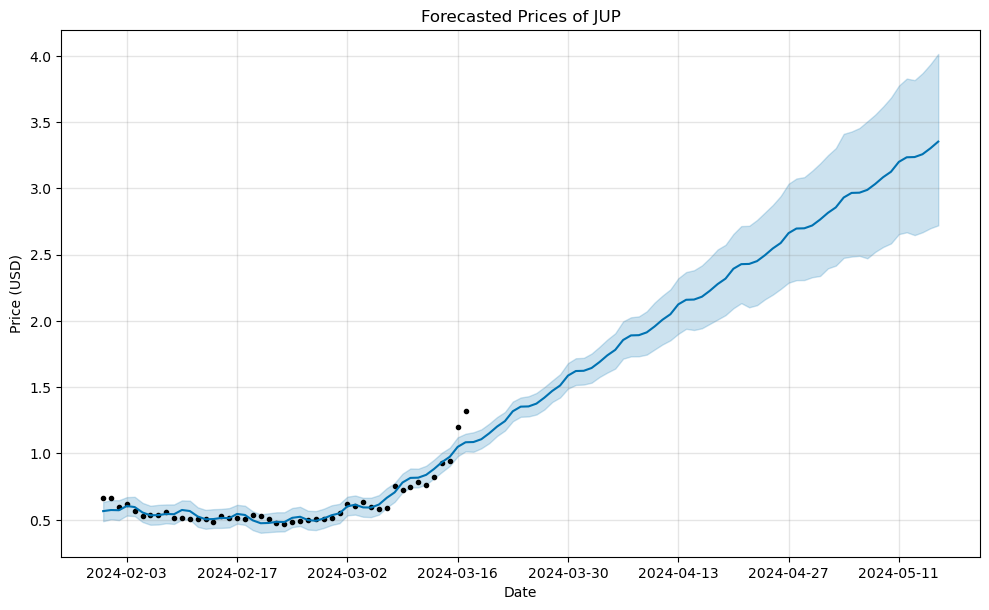

In [21]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasted Prices of JUP')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


In [22]:
merged_data

,snapped_at,uni_price,uni_market_cap,uni_total_volume,orca_price,orca_market_cap,orca_total_volume,jup_price,jup_market_cap,jup_total_volume
0,2024-01-31,6.259800,4.711687e+09,9.259000e+07,5.883468,2.902142e+08,5.019147e+06,0.662562,8.999919e+08,5.109083e+08
1,2024-02-01,5.997856,4.523220e+09,1.060541e+08,4.953844,2.443703e+08,6.237534e+06,0.662562,8.999919e+08,5.109083e+08
2,2024-02-02,6.043764,4.553898e+09,8.629487e+07,4.804208,2.373514e+08,4.831936e+06,0.598275,7.981273e+08,3.870627e+08
3,2024-02-03,6.136098,4.625514e+09,7.441007e+07,4.616161,2.283137e+08,3.879238e+06,0.616372,8.343642e+08,3.988492e+08
4,2024-02-04,6.103826,4.598965e+09,6.061341e+07,4.793391,2.358528e+08,2.482521e+06,0.568014,7.676758e+08,2.593055e+08
5,2024-02-05,5.985344,4.509545e+09,5.097234e+07,4.410529,2.181824e+08,2.441692e+06,0.530981,7.159307e+08,2.067366e+08
6,2024-02-06,6.000089,4.521759e+09,5.721124e+07,4.097126,2.027588e+08,4.122732e+06,0.539041,7.283082e+08,1.638620e+08
7,2024-02-07,6.280766,4.732909e+09,8.659747e+07,3.996281,1.973841e+08,3.365472e+06,0.533297,7.209800e+08,1.299278e+08
8,2024-02-08,6.390414,4.816578e+09,7.527909e+07,4.127818,2.039946e+08,3.267416e+06,0.555487,7.520298e+08,2.880099e+08
9,2024-02-09,6.318868,4.766534e+09,7.216230e+07,4.080480,2.019434e+08,2.879155e+06,0.512000,6.937930e+08,1.983070e+08


## Version 2

In [102]:
import pandas as pd
from prophet import Prophet

# Load Orca data
orca_data = pd.read_csv("orca-usd-max.csv")
orca_data.rename(columns={'price': 'orca_price', 'total_volume': 'orca_total_volume', 'market_cap': 'orca_market_cap'}, inplace=True)

# Load Uni data
uni_data = pd.read_csv("uni-usd-max.csv")
uni_data.rename(columns={'price': 'uni_price', 'total_volume': 'uni_total_volume', 'market_cap': 'uni_market_cap'}, inplace=True)

# Load JUP data
jup_data = pd.read_csv("jup-usd-max.csv")
jup_data.rename(columns={'price': 'jup_price', 'total_volume': 'jup_total_volume', 'market_cap': 'jup_market_cap'}, inplace=True)

# Merge Orca, Uni, and JUP data on 'snapped_at' column
merged_data = pd.merge(orca_data, uni_data, on='snapped_at', how='outer')
merged_data = pd.merge(merged_data, jup_data, on='snapped_at', how='outer')

# Remove timezone from 'snapped_at' column
merged_data['snapped_at'] = pd.to_datetime(merged_data['snapped_at']).dt.tz_localize(None)

# Merge Orca, Uni, and JUP data on 'snapped_at' column
merged_data = pd.merge(orca_data, uni_data, on='snapped_at', how='outer')
merged_data = pd.merge(merged_data, jup_data, on='snapped_at', how='outer')

# Remove timezone from 'snapped_at' column
merged_data['snapped_at'] = pd.to_datetime(merged_data['snapped_at']).dt.tz_localize(None)

# Handling missing values
merged_data.fillna(method='ffill', inplace=True)  # Using forward fill to fill missing values

# Prepare data for Prophet
prophet_data = merged_data.rename(columns={'snapped_at': 'ds', 'jup_price': 'y'})

# Instantiate Prophet model with additional regressors (Uni and Orca features)
model = Prophet()
model.add_regressor('orca_price')
model.add_regressor('orca_total_volume')
model.add_regressor('uni_price')
model.add_regressor('uni_total_volume')

# Fit the Prophet model
model.fit(prophet_data)

# Make future predictions for JUP timestamps
future = model.make_future_dataframe(periods=365)  # Predict for 1 year (adjust as needed)

# Rename 'snapped_at' column to 'ds' in merged_data
merged_data.rename(columns={'snapped_at': 'ds'}, inplace=True)

# Merge future dataframe with relevant regressor columns
future = pd.merge(future, merged_data[['ds', 'orca_price', 'orca_total_volume', 'uni_price', 'uni_total_volume']], on='ds', how='left')
# Drop rows with NaN values
future.fillna(method='ffill', inplace=True)

# Make predictions
forecast = model.predict(future)

# Extract the forecasted values for JUP timestamps
jup_forecast = forecast[-365:]  # Assuming you want to extract the last year of forecasts

# Display the forecasted values for JUP prices
print(jup_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])



22:59:11 - cmdstanpy - INFO - Chain [1] start processing
22:59:11 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
1277 2024-03-17  0.794887    0.748394    0.841681
1278 2024-03-18  0.801985    0.753048    0.847759
1279 2024-03-19  0.795504    0.748852    0.841677
1280 2024-03-20  0.794868    0.748334    0.839475
1281 2024-03-21  0.795498    0.751297    0.841216
...         ...       ...         ...         ...
1637 2025-03-12  0.609482    0.560464    0.658376
1638 2025-03-13  0.617924    0.564052    0.665649
1639 2025-03-14  0.618412    0.574384    0.667853
1640 2025-03-15  0.628633    0.584592    0.674354
1641 2025-03-16  0.626174    0.574110    0.674236

[365 rows x 4 columns]


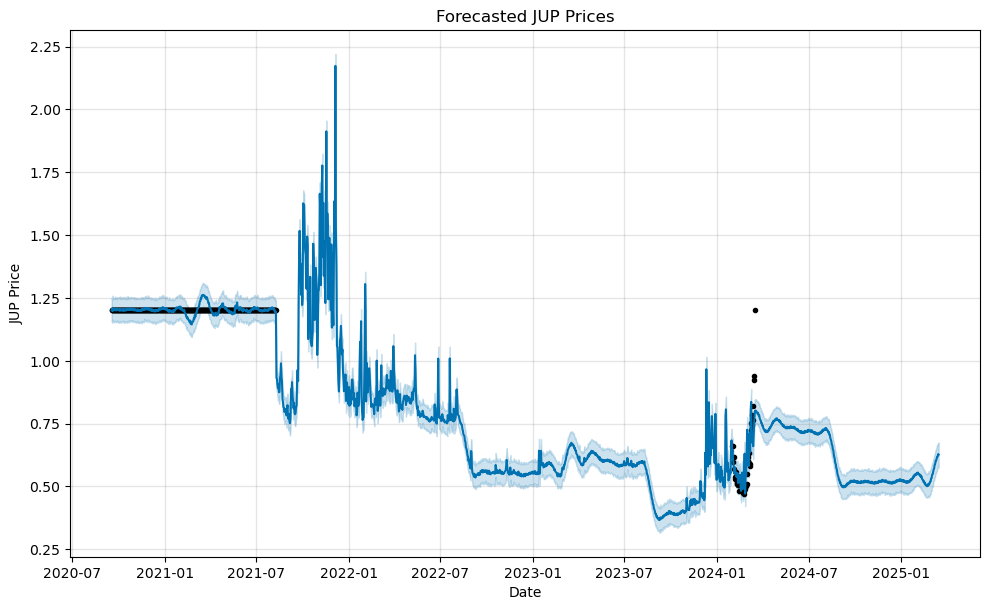

In [103]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = model.plot(forecast, xlabel='Date', ylabel='JUP Price')
plt.title('Forecasted JUP Prices')
plt.show()


# Version 3 Jup Marketcap and Volume

In [104]:
import pandas as pd
from prophet import Prophet

# Load Orca data
orca_data = pd.read_csv("orca-usd-max.csv")
orca_data.rename(columns={'price': 'orca_price', 'total_volume': 'orca_total_volume', 'market_cap': 'orca_market_cap'}, inplace=True)

# Load Uni data
uni_data = pd.read_csv("uni-usd-max.csv")
uni_data.rename(columns={'price': 'uni_price', 'total_volume': 'uni_total_volume', 'market_cap': 'uni_market_cap'}, inplace=True)

# Load JUP data
jup_data = pd.read_csv("jup-usd-max.csv")
jup_data.rename(columns={'price': 'jup_price', 'total_volume': 'jup_total_volume', 'market_cap': 'jup_market_cap'}, inplace=True)

# Merge Orca, Uni, and JUP data on 'snapped_at' column
merged_data = pd.merge(orca_data, uni_data, on='snapped_at', how='outer')
merged_data = pd.merge(merged_data, jup_data, on='snapped_at', how='outer')

# Remove timezone from 'snapped_at' column
merged_data['snapped_at'] = pd.to_datetime(merged_data['snapped_at']).dt.tz_localize(None)

# Merge Orca, Uni, and JUP data on 'snapped_at' column
merged_data = pd.merge(orca_data, uni_data, on='snapped_at', how='outer')
merged_data = pd.merge(merged_data, jup_data, on='snapped_at', how='outer')

# Remove timezone from 'snapped_at' column
merged_data['snapped_at'] = pd.to_datetime(merged_data['snapped_at']).dt.tz_localize(None)

# Handling missing values
merged_data.fillna(method='ffill', inplace=True)  # Using forward fill to fill missing values

# Prepare data for Prophet
prophet_data = merged_data.rename(columns={'snapped_at': 'ds', 'jup_price': 'y'})

# Instantiate Prophet model with additional regressors (Uni and Orca features)
# Instantiate Prophet model with additional regressors (Uni, Orca, JUP market cap, and JUP volume)
model = Prophet()
model.add_regressor('orca_price')
model.add_regressor('orca_total_volume')
model.add_regressor('uni_price')
model.add_regressor('uni_total_volume')
model.add_regressor('jup_market_cap')  # Adding JUP market cap as a regressor
model.add_regressor('jup_total_volume')  # Adding JUP volume as a regressor


# Fit the Prophet model
model.fit(prophet_data)

# Make future predictions for JUP timestamps
future = model.make_future_dataframe(periods=365)  # Predict for 1 year (adjust as needed)

# Rename 'snapped_at' column to 'ds' in merged_data
merged_data.rename(columns={'snapped_at': 'ds'}, inplace=True)

# Merge future dataframe with relevant regressor columns from merged_data
future = pd.merge(future, merged_data[['ds', 'orca_price', 'orca_total_volume', 'uni_price', 'uni_total_volume', 'jup_market_cap', 'jup_total_volume']], on='ds', how='left')

# Fill missing values in the future dataframe using forward fill
future.fillna(method='ffill', inplace=True)

# Make predictions
forecast = model.predict(future)

# Extract the forecasted values for JUP timestamps
jup_forecast = forecast[-365:]  # Assuming you want to extract the last year of forecasts

# Display the forecasted values for JUP prices
print(jup_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])



22:59:21 - cmdstanpy - INFO - Chain [1] start processing
22:59:21 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
1277 2024-03-17  1.203536    1.202861    1.204206
1278 2024-03-18  1.203693    1.202984    1.204381
1279 2024-03-19  1.203697    1.203028    1.204444
1280 2024-03-20  1.203721    1.203016    1.204409
1281 2024-03-21  1.203755    1.203053    1.204486
...         ...       ...         ...         ...
1637 2025-03-12  1.204827    1.198106    1.210977
1638 2025-03-13  1.204878    1.198354    1.211222
1639 2025-03-14  1.205201    1.198726    1.211509
1640 2025-03-15  1.205012    1.198400    1.211268
1641 2025-03-16  1.205104    1.198268    1.211460

[365 rows x 4 columns]


In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual JUP prices
actual_prices = merged_data['jup_price'].values[-365:]

# Predicted JUP prices
predicted_prices = jup_forecast['yhat'].values

# Calculate MAE
mae = mean_absolute_error(actual_prices, predicted_prices)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(actual_prices, predicted_prices)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.0648020326586005
Mean Squared Error (MSE): 0.04016854429070921
Root Mean Squared Error (RMSE): 0.20042091779729282


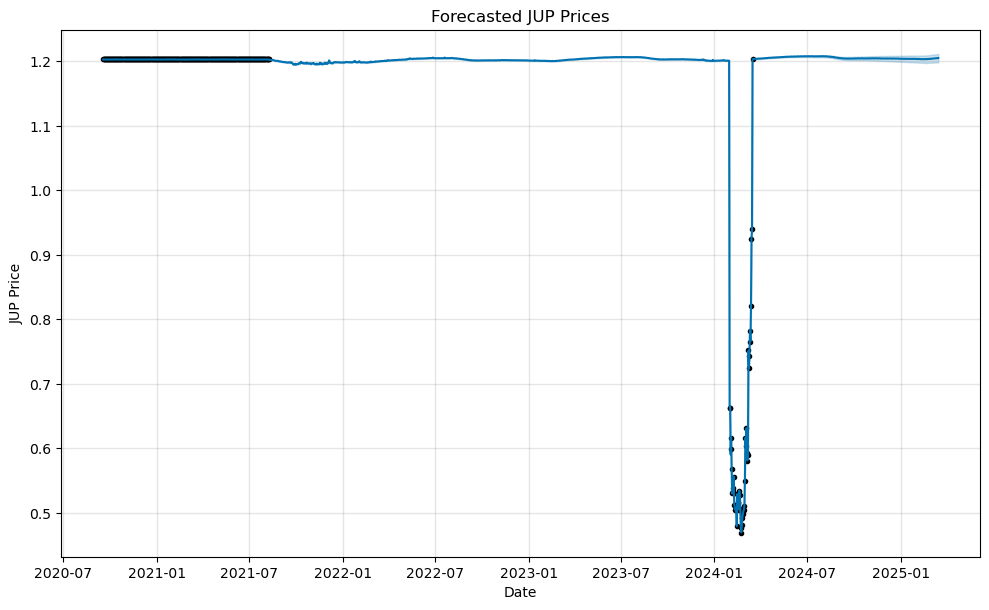

In [106]:
import matplotlib.pyplot as plt

# Plot the forecast
model.plot(forecast, xlabel='Date', ylabel='JUP Price')
plt.title('Forecasted JUP Prices')
plt.show()
